In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from numpy import nan
import matplotlib.pyplot as plt

In [2]:
input_file = 'most-recent-cohorts-all-data-elements-1.csv'
column_template = 'column_heading_template.csv'
path = './data/'
path2 = './data_documentation/'

In [3]:
df = pd.read_csv(path+input_file, low_memory=False)

In [4]:
df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMENRUP_PARTTIME_POOLED_SUPP,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN,POOLYRS_FTFTAIDPCT,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,0.3193,0.7057,0.7143,5343.0,1165.0,1288.0,2.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu,https://uab.studentaidcalculator.com/survey.aspx,...,0.2475,0.3788,0.5350,14445.0,10498.0,2228.0,2.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,0.2836,1.0000,1.0000,440.0,527.0,5.0,4.0,PrivacySuppressed,PrivacySuppressed,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.2496,0.2707,0.4556,8145.0,2443.0,1341.0,2.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,0.2621,0.7792,0.7539,4732.0,642.0,951.0,2.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6801,48511112,157114,1571,Georgia Military College - Dublin,Dublin,GA,310215149,Southern Association of Colleges and Schools C...,https://www.gmc.edu/index.cms,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6802,48511113,157115,1571,Georgia Military College - Eastman,Eastman,GA,310236109,Southern Association of Colleges and Schools C...,https://www.gmc.edu/index.cms,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6803,48616901,4204801,42048,American College of Barbering - Florence,Florence,KY,410421801,National Accrediting Commission of Career Arts...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6804,49005401,4182601,41826,HCI College - Fort Lauderdale Campus,Fort Lauderdale,FL,33309,Accrediting Commission of Career Schools and C...,www.hci.edu/,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.loc[1,'UNITID']

100663

In [6]:
len(df)

6806

In [7]:
df.replace(to_replace = 'PrivacySuppressed', value = nan, inplace = True)

In [8]:
df.loc[df['OPEID6'] == 21997, 'MN_EARN_WNE_P8']

23    NaN
Name: MN_EARN_WNE_P8, dtype: object

In [9]:
column_heading_df = pd.read_csv(path2 + column_template)

In [10]:
column_heading_df

,dev-category,VARIABLE NAME,developer-friendly name,API data type,NAME OF DATA ELEMENT,VALUE,LABEL,SOURCE,NOTES
0,academics,MTHCMP1,program_reporter.program_1.cip_6_digit.avg_mon...,integer,Average number of months needed to complete la...,(blank),(blank),IPEDS,(blank)
1,academics,MTHCMP2,program_reporter.program_2.cip_6_digit.avg_mon...,integer,Average number of months needed to complete pr...,(blank),(blank),IPEDS,(blank)
2,academics,MTHCMP3,program_reporter.program_3.cip_6_digit.avg_mon...,integer,Average number of months needed to complete pr...,(blank),(blank),IPEDS,(blank)
3,academics,MTHCMP4,program_reporter.program_4.cip_6_digit.avg_mon...,integer,Average number of months needed to complete pr...,(blank),(blank),IPEDS,(blank)
4,academics,MTHCMP5,program_reporter.program_5.cip_6_digit.avg_mon...,integer,Average number of months needed to complete pr...,(blank),(blank),IPEDS,(blank)
...,...,...,...,...,...,...,...,...,...
597,student,UG_HISPOLD,demographics.race_ethnicity.hispanic_2000,float,Total share of enrollment of undergraduate stu...,(blank),(blank),IPEDS,Not available in all datafiles due to changing...
598,student,UG_NRA,demographics.non_resident_aliens_2000,float,Total share of enrollment of undergraduate stu...,(blank),(blank),IPEDS,Not available in all datafiles due to changing...
599,student,UG_WHITENH,demographics.race_ethnicity.white_2000,float,Total share of enrollment of undergraduate stu...,(blank),(blank),IPEDS,Not available in all datafiles due to changing...
600,student,UG_UNKN,demographics.race_ethnicity.unknown_2000,float,Total share of enrollment of undergraduate stu...,(blank),(blank),IPEDS,Not available in all datafiles due to changing...


In [11]:
complete_variable_name_list = df.columns.to_list()
complete_variable_name_list

['UNITID',
 'OPEID',
 'OPEID6',
 'INSTNM',
 'CITY',
 'STABBR',
 'ZIP',
 'ACCREDAGENCY',
 'INSTURL',
 'NPCURL',
 'SCH_DEG',
 'HCM2',
 'MAIN',
 'NUMBRANCH',
 'PREDDEG',
 'HIGHDEG',
 'CONTROL',
 'ST_FIPS',
 'REGION',
 'LOCALE',
 'LOCALE2',
 'LATITUDE',
 'LONGITUDE',
 'CCBASIC',
 'CCUGPROF',
 'CCSIZSET',
 'HBCU',
 'PBI',
 'ANNHI',
 'TRIBAL',
 'AANAPII',
 'HSI',
 'NANTI',
 'MENONLY',
 'WOMENONLY',
 'RELAFFIL',
 'ADM_RATE',
 'ADM_RATE_ALL',
 'SATVR25',
 'SATVR75',
 'SATMT25',
 'SATMT75',
 'SATWR25',
 'SATWR75',
 'SATVRMID',
 'SATMTMID',
 'SATWRMID',
 'ACTCM25',
 'ACTCM75',
 'ACTEN25',
 'ACTEN75',
 'ACTMT25',
 'ACTMT75',
 'ACTWR25',
 'ACTWR75',
 'ACTCMMID',
 'ACTENMID',
 'ACTMTMID',
 'ACTWRMID',
 'SAT_AVG',
 'SAT_AVG_ALL',
 'PCIP01',
 'PCIP03',
 'PCIP04',
 'PCIP05',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP12',
 'PCIP13',
 'PCIP14',
 'PCIP15',
 'PCIP16',
 'PCIP19',
 'PCIP22',
 'PCIP23',
 'PCIP24',
 'PCIP25',
 'PCIP26',
 'PCIP27',
 'PCIP29',
 'PCIP30',
 'PCIP31',
 'PCIP38',
 'PCIP39',
 'PCIP40',

In [12]:
filtered_variable_name_list = column_heading_df['VARIABLE NAME'].unique().tolist()
filtered_variable_name_list

['MTHCMP1',
 'MTHCMP2',
 'MTHCMP3',
 'MTHCMP4',
 'MTHCMP5',
 'MTHCMP6',
 'CIP01BACHL',
 'CIP04BACHL',
 'CIP05BACHL',
 'CIP26BACHL',
 'CIP52BACHL',
 'CIP09BACHL',
 'CIP10BACHL',
 'CIP11BACHL',
 'CIP46BACHL',
 'CIP13BACHL',
 'CIP15BACHL',
 'CIP14BACHL',
 'CIP23BACHL',
 'CIP19BACHL',
 'CIP16BACHL',
 'CIP51BACHL',
 'CIP54BACHL',
 'CIP43BACHL',
 'CIP22BACHL',
 'CIP24BACHL',
 'CIP25BACHL',
 'CIP27BACHL',
 'CIP47BACHL',
 'CIP29BACHL',
 'CIP30BACHL',
 'CIP03BACHL',
 'CIP31BACHL',
 'CIP12BACHL',
 'CIP38BACHL',
 'CIP40BACHL',
 'CIP48BACHL',
 'CIP42BACHL',
 'CIP44BACHL',
 'CIP41BACHL',
 'CIP45BACHL',
 'CIP39BACHL',
 'CIP49BACHL',
 'CIP50BACHL',
 'CIPCODE1',
 'CIPCODE2',
 'CIPCODE3',
 'CIPCODE4',
 'CIPCODE5',
 'CIPCODE6',
 'CIPTITLE1',
 'CIPTITLE2',
 'CIPTITLE3',
 'CIPTITLE4',
 'CIPTITLE5',
 'CIPTITLE6',
 'PRGMOFR',
 'PCIP01',
 'PCIP04',
 'PCIP05',
 'PCIP26',
 'PCIP52',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP46',
 'PCIP13',
 'PCIP15',
 'PCIP14',
 'PCIP23',
 'PCIP19',
 'PCIP16',
 'PCIP51',
 'PCIP54

In [13]:
df['PCT90_EARN_WNE_P10']

0       70000
1       84000
2       79500
3       93300
4       55400
        ...  
6801      NaN
6802      NaN
6803      NaN
6804      NaN
6805      NaN
Name: PCT90_EARN_WNE_P10, Length: 6806, dtype: object

In [14]:
filtered_df = df.copy()


In [15]:
for variable in complete_variable_name_list:
    if variable not in filtered_variable_name_list:
        filtered_df.drop(columns = variable, inplace = True)

In [16]:
filtered_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,SCH_DEG,MAIN,...,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6801,48511112,157114,1571,Georgia Military College - Dublin,Dublin,GA,310215149,https://www.gmc.edu/index.cms,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6802,48511113,157115,1571,Georgia Military College - Eastman,Eastman,GA,310236109,https://www.gmc.edu/index.cms,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6803,48616901,4204801,42048,American College of Barbering - Florence,Florence,KY,410421801,NaN,NaN,0,...,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6804,49005401,4182601,41826,HCI College - Fort Lauderdale Campus,Fort Lauderdale,FL,33309,www.hci.edu/,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
filtered_df.columns

Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'INSTURL', 'SCH_DEG', 'MAIN',
       ...
       'CIPTFBSANNUAL6', 'MTHCMP1', 'MTHCMP2', 'MTHCMP3', 'MTHCMP4', 'MTHCMP5',
       'MTHCMP6', 'FTFTPCTPELL_POOLED_SUPP', 'FTFTPCTFLOAN_POOLED_SUPP',
       'SCUGFFN_POOLED'],
      dtype='object', length=602)

In [18]:
column_heading_df['dev-category'].unique()

array(['academics', 'admissions', 'aid', 'completion', 'cost', 'earnings',
       'repayment', 'root', 'school', 'student'], dtype=object)

In [19]:
df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMENRUP_PARTTIME_POOLED_SUPP,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN,POOLYRS_FTFTAIDPCT,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,0.3193,0.7057,0.7143,5343.0,1165.0,1288.0,2.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu,https://uab.studentaidcalculator.com/survey.aspx,...,0.2475,0.3788,0.5350,14445.0,10498.0,2228.0,2.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,0.2836,1.0000,1.0000,440.0,527.0,5.0,4.0,NaN,NaN,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.2496,0.2707,0.4556,8145.0,2443.0,1341.0,2.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,0.2621,0.7792,0.7539,4732.0,642.0,951.0,2.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6801,48511112,157114,1571,Georgia Military College - Dublin,Dublin,GA,310215149,Southern Association of Colleges and Schools C...,https://www.gmc.edu/index.cms,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6802,48511113,157115,1571,Georgia Military College - Eastman,Eastman,GA,310236109,Southern Association of Colleges and Schools C...,https://www.gmc.edu/index.cms,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6803,48616901,4204801,42048,American College of Barbering - Florence,Florence,KY,410421801,National Accrediting Commission of Career Arts...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6804,49005401,4182601,41826,HCI College - Fort Lauderdale Campus,Fort Lauderdale,FL,33309,Accrediting Commission of Career Schools and C...,www.hci.edu/,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.loc[df['INSTNM'] == 'Harvard University', ['PREDDEG','NPT4_PRIV', 'TUITIONFEE_IN']]

,PREDDEG,NPT4_PRIV,TUITIONFEE_IN
1492,3,15561.0,50420.0


In [21]:
df.loc[df['INSTNM'] == 'Ohio State University-Main Campus', ['PREDDEG','NPT4_PRIV', 'TUITIONFEE_IN']]

,PREDDEG,NPT4_PRIV,TUITIONFEE_IN
2666,3,NaN,10726.0


In [22]:
df.loc[df['INSTNM'] == 'Dartmouth College', ['PREDDEG','NPT4_PRIV', 'TUITIONFEE_IN']]

,PREDDEG,NPT4_PRIV,TUITIONFEE_IN
1959,3,31449.0,55453.0


In [23]:
df.loc[df['INSTNM'] == 'Harvey Mudd College', ['PREDDEG','NPT4_PRIV', 'TUITIONFEE_IN']]

,PREDDEG,NPT4_PRIV,TUITIONFEE_IN
315,3,32739.0,56620.0


In [24]:
df.columns

Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'ACCREDAGENCY', 'INSTURL', 'NPCURL',
       ...
       'OMENRUP_PARTTIME_POOLED_SUPP', 'FTFTPCTPELL', 'FTFTPCTFLOAN', 'UG12MN',
       'G12MN', 'SCUGFFN', 'POOLYRS_FTFTAIDPCT', 'FTFTPCTPELL_POOLED_SUPP',
       'FTFTPCTFLOAN_POOLED_SUPP', 'SCUGFFN_POOLED'],
      dtype='object', length=1986)

In [25]:
df['PREDDEG']

0       3
1       3
2       3
3       3
4       3
       ..
6801    0
6802    0
6803    0
6804    0
6805    0
Name: PREDDEG, Length: 6806, dtype: int64

In [26]:
df.loc[df['PREDDEG'] == 3, :]

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMENRUP_PARTTIME_POOLED_SUPP,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN,POOLYRS_FTFTAIDPCT,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,0.3193,0.7057,0.7143,5343.0,1165.0,1288.0,2.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu,https://uab.studentaidcalculator.com/survey.aspx,...,0.2475,0.3788,0.5350,14445.0,10498.0,2228.0,2.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,0.2836,1.0000,1.0000,440.0,527.0,5.0,4.0,NaN,NaN,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.2496,0.2707,0.4556,8145.0,2443.0,1341.0,2.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,0.2621,0.7792,0.7539,4732.0,642.0,951.0,2.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,492069,4276100,42761,Champion Christian College,Hot Springs,AR,71913,Transnational Association of Christian College...,championchristiancollege.com,championchristiancollege.com/NetPriceCalculato...,...,NaN,0.0000,0.0000,57.0,NaN,20.0,4.0,NaN,NaN,20.0
6314,492689,1067401,10674,Texas Tech University Health Sciences Center-E...,El Paso,TX,79905-2827,Southern Association of Colleges and Schools C...,elpaso.ttuhsc.edu/,www.depts.ttu.edu/financialaid/netCostCalcHome...,...,NaN,NaN,NaN,370.0,471.0,0.0,4.0,NaN,NaN,0.0
6318,492759,638521,6385,Chamberlain University-Louisiana,Jefferson,LA,70121,Higher Learning Commission,https://www.chamberlain.edu/,https://www.chamberlain.edu/admissions/financi...,...,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN
6319,492801,246100,2461,Drury University-College of Continuing Profess...,Springfield,MO,65802,Higher Learning Commission,www.drury.edu/ccps/,tcc.ruffalonl.com/Drury%20University/Freshman-...,...,0.3681,0.7619,0.4048,2857.0,NaN,42.0,2.0,0.7619,0.4048,42.0


In [27]:
cost_df = filtered_df.loc[df['PREDDEG'] == 3, ['INSTNM', 'STABBR','TUITIONFEE_IN', 'TUITIONFEE_OUT', 'PCT10_EARN_WNE_P6', 'PCT25_EARN_WNE_P6', 'PCT75_EARN_WNE_P6', 'PCT90_EARN_WNE_P6', 'MN_EARN_WNE_P6']]

In [28]:
cost_df

,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6
0,Alabama A & M University,AL,9744.0,18354.0,4500,15000,36800,51400,28400
1,University of Alabama at Birmingham,AL,8568.0,19704.0,9700,21000,50800,66200,39400
2,Amridge University,AL,6900.0,6900.0,7300,15200,47200,75400,35400
3,University of Alabama in Huntsville,AL,10714.0,22362.0,9100,22700,56900,70300,40300
4,Alabama State University,AL,11068.0,19396.0,4300,13700,32100,39800,24400
...,...,...,...,...,...,...,...,...,...
6299,Champion Christian College,AR,5240.0,5240.0,NaN,NaN,NaN,NaN,NaN
6314,Texas Tech University Health Sciences Center-E...,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6318,Chamberlain University-Louisiana,LA,19375.0,19375.0,NaN,NaN,NaN,NaN,NaN
6319,Drury University-College of Continuing Profess...,MO,6247.0,6247.0,NaN,NaN,NaN,NaN,NaN


In [29]:
cost_df = cost_df.fillna(0)

In [30]:
cost_df=cost_df.sort_values(by = 'TUITIONFEE_IN', ascending = False).reset_index()

In [31]:
cost_df

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6
0,2153,Columbia University in the City of New York,NY,59430.0,59430.0,13200,40500,97900,165900,77900
1,890,University of Chicago,IL,58230.0,58230.0,11900,33200,85200,160400,72100
2,2368,Vassar College,NY,56960.0,56960.0,9000,22700,49900,61200,39400
3,600,Trinity College,CT,56910.0,56910.0,13500,30600,66800,87100,52000
4,2219,Jewish Theological Seminary of America,NY,56778.0,56778.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2053,229,Sofia University,CA,0.0,0.0,0,0,0,0,0
2054,2347,SUNY Downstate Health Sciences University,NY,0.0,0.0,34900,55100,98700,127700,80400
2055,3560,Bon Secours Memorial College of Nursing,VA,0.0,0.0,26300,36200,63900,71800,50600
2056,309,Golden Gate University-San Francisco,CA,0.0,0.0,14100,43000,94000,127100,72900


In [32]:
cost_df.loc[cost_df['INSTNM'] == 'Ohio State University-Main Campus', :]

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6
1382,2666,Ohio State University-Main Campus,OH,10726.0,30742.0,10700,24400,54000,65700,41500


In [33]:
cost_df.loc[cost_df['index'] == 2666, :]

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6
1382,2666,Ohio State University-Main Campus,OH,10726.0,30742.0,10700,24400,54000,65700,41500


In [34]:
cost_df.loc[cost_df['INSTNM'] == 'Smith College', :]

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6
81,1544,Smith College,MA,52404.0,52404.0,8900,18900,48700,63300,37400


In [35]:
cost_clean_df = cost_df.copy()

In [36]:
x = cost_clean_df['TUITIONFEE_IN'].to_list()
y1 = cost_clean_df['PCT10_EARN_WNE_P6'].astype(int).to_list()
y2 = cost_clean_df['PCT25_EARN_WNE_P6'].astype(int).to_list()
y3 = cost_clean_df['PCT75_EARN_WNE_P6'].astype(int).to_list()
y4 = cost_clean_df['PCT90_EARN_WNE_P6'].astype(int).to_list()
y5 = cost_clean_df['MN_EARN_WNE_P6'].astype(int).to_list()

In [37]:
x


[59430.0,
 58230.0,
 56960.0,
 56910.0,
 56778.0,
 56620.0,
 56550.0,
 56426.0,
 56382.0,
 56340.0,
 56225.0,
 56092.0,
 55930.0,
 55900.0,
 55870.0,
 55695.0,
 55584.0,
 55470.0,
 55466.0,
 55465.0,
 55464.0,
 55453.0,
 55450.0,
 55395.0,
 55290.0,
 55255.0,
 55230.0,
 55210.0,
 55188.0,
 55052.0,
 55032.0,
 55024.0,
 54944.0,
 54846.0,
 54838.0,
 54820.0,
 54820.0,
 54759.0,
 54686.0,
 54680.0,
 54661.0,
 54620.0,
 54568.0,
 54492.0,
 54480.0,
 54450.0,
 54420.0,
 54405.0,
 54344.0,
 54118.0,
 54104.0,
 54056.0,
 53948.0,
 53932.0,
 53922.0,
 53909.0,
 53880.0,
 53860.0,
 53794.0,
 53740.0,
 53736.0,
 53732.0,
 53630.0,
 53430.0,
 53399.0,
 53391.0,
 53343.0,
 53322.0,
 53308.0,
 53244.0,
 52930.0,
 52780.0,
 52770.0,
 52764.0,
 52724.0,
 52687.0,
 52626.0,
 52610.0,
 52595.0,
 52588.0,
 52455.0,
 52404.0,
 52392.0,
 52362.0,
 52360.0,
 52202.0,
 52050.0,
 51960.0,
 51870.0,
 51853.0,
 51832.0,
 51828.0,
 51711.0,
 51668.0,
 51522.0,
 51447.0,
 51354.0,
 51306.0,
 51104.0,
 50960.0,


In [38]:
y1

[13200,
 11900,
 9000,
 13500,
 0,
 14900,
 10600,
 9200,
 18500,
 4600,
 13500,
 18400,
 10000,
 4800,
 13100,
 19700,
 23500,
 7600,
 10500,
 14600,
 21300,
 15600,
 7100,
 7000,
 10300,
 8000,
 15500,
 10600,
 14900,
 6300,
 8100,
 6400,
 8500,
 10000,
 8400,
 10300,
 10100,
 9100,
 7900,
 4400,
 9800,
 11000,
 15200,
 12100,
 12200,
 14000,
 6700,
 14600,
 8500,
 4600,
 23300,
 5900,
 14200,
 13400,
 11600,
 11400,
 23600,
 5000,
 13100,
 16900,
 0,
 12600,
 16400,
 14000,
 12600,
 21400,
 6700,
 13000,
 20300,
 15300,
 20100,
 5200,
 18800,
 4600,
 9700,
 9500,
 11100,
 14800,
 11400,
 5100,
 17300,
 8900,
 6100,
 0,
 10300,
 19000,
 9700,
 6500,
 6700,
 13000,
 19400,
 8300,
 12700,
 3700,
 15700,
 14400,
 18700,
 12900,
 24300,
 5200,
 5200,
 11700,
 20800,
 16500,
 18800,
 6800,
 9900,
 6900,
 10100,
 0,
 4500,
 9600,
 26200,
 22700,
 12700,
 10500,
 7200,
 11300,
 10200,
 11000,
 19500,
 10200,
 5600,
 4300,
 6300,
 6300,
 19100,
 17200,
 5700,
 6800,
 6700,
 10200,
 11600,
 2

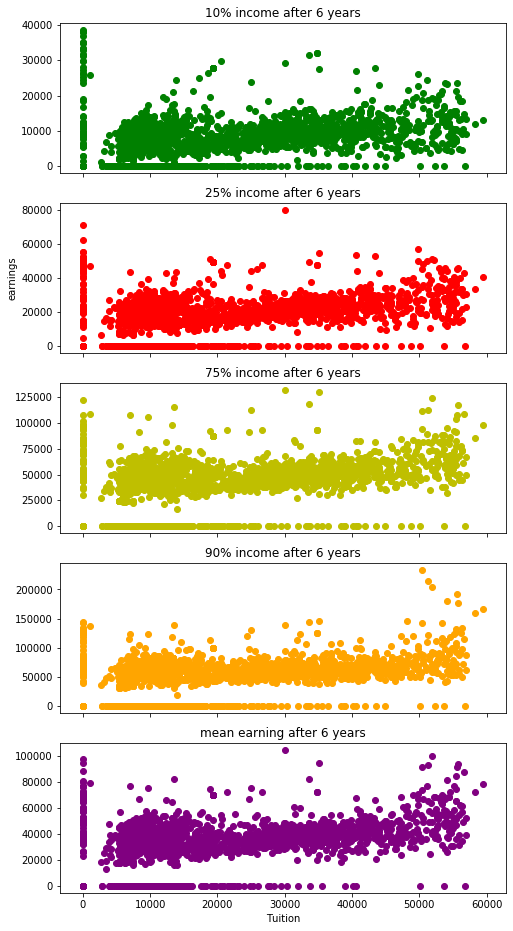

In [39]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1, sharex = True, figsize=(8,16))
ax1.set_title("10% income after 6 years")
ax2.set_title("25% income after 6 years")
ax3.set_title("75% income after 6 years")
ax4.set_title("90% income after 6 years")
ax5.set_title("mean earning after 6 years")
ax5.set_xlabel("Tuition")
ax2.set_ylabel("earnings")
ax1.scatter(x,y1, color = 'g')

ax2.scatter(x,y2, color = 'r')

ax3.scatter(x,y3, color = 'y')

ax4.scatter(x,y4, color = 'orange')
ax5.scatter(x,y5, color = 'purple')

plt.show()

In [40]:
cost_clean_df.loc[cost_clean_df['PCT90_EARN_WNE_P6'].astype(int) > 150000, :]

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6
0,2153,Columbia University in the City of New York,NY,59430.0,59430.0,13200,40500,97900,165900,77900
1,890,University of Chicago,IL,58230.0,58230.0,11900,33200,85200,160400,72100
15,2413,Duke University,NC,55695.0,55695.0,19700,46000,117100,176900,93200
16,2992,University of Pennsylvania,PA,55584.0,55584.0,23500,45400,108000,191500,91200
50,621,Georgetown University,DC,54104.0,54104.0,23300,44200,95500,179900,81100
90,1508,Massachusetts Institute of Technology,MA,51832.0,51832.0,19400,50800,124100,203700,99600
96,3841,Stanford University,CA,51354.0,51354.0,18700,41600,112800,214600,92800
104,1492,Harvard University,MA,50420.0,50420.0,18800,45100,111300,233800,91300


In [41]:
cost_clean_df.loc[cost_clean_df['INSTNM'] == 'Smith College', :]

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6
81,1544,Smith College,MA,52404.0,52404.0,8900,18900,48700,63300,37400


In [42]:
cost_clean_df.describe()

,index,TUITIONFEE_IN,TUITIONFEE_OUT
count,2058.000000,2058.000000,2058.000000
mean,2507.677357,21140.330904,24318.506317
std,1567.057753,14867.713737,13712.741397
min,0.000000,0.000000,0.000000
25%,1267.250000,8979.500000,14604.500000
50%,2345.500000,16540.500000,22425.000000
75%,3467.750000,32007.500000,33283.500000
max,6322.000000,59430.000000,59430.000000


In [43]:
#PREDEG == 3 is the university is predominately a 4 year school.
filtered_4_year_df = filtered_df.loc[df['PREDDEG'] == 3, :]
filtered_4_year_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,SCH_DEG,MAIN,...,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,492069,4276100,42761,Champion Christian College,Hot Springs,AR,71913,championchristiancollege.com,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0
6314,492689,1067401,10674,Texas Tech University Health Sciences Center-E...,El Paso,TX,79905-2827,elpaso.ttuhsc.edu/,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6318,492759,638521,6385,Chamberlain University-Louisiana,Jefferson,LA,70121,https://www.chamberlain.edu/,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6319,492801,246100,2461,Drury University-College of Continuing Profess...,Springfield,MO,65802,www.drury.edu/ccps/,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7619,0.4048,42.0


In [44]:
filtered_4_year_df = filtered_4_year_df.fillna(0)
filtered_4_year_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,SCH_DEG,MAIN,...,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,492069,4276100,42761,Champion Christian College,Hot Springs,AR,71913,championchristiancollege.com,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,20.0
6314,492689,1067401,10674,Texas Tech University Health Sciences Center-E...,El Paso,TX,79905-2827,elpaso.ttuhsc.edu/,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
6318,492759,638521,6385,Chamberlain University-Louisiana,Jefferson,LA,70121,https://www.chamberlain.edu/,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
6319,492801,246100,2461,Drury University-College of Continuing Profess...,Springfield,MO,65802,www.drury.edu/ccps/,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7619,0.4048,42.0


Begin random forest regession.

In [45]:
#try to predict median income.  Must drop all columns relating to income from data set.
#determine all column headings with earnings as the dev-category
column_heading_df.loc[column_heading_df['dev-category'] == 'earnings', :]

,dev-category,VARIABLE NAME,developer-friendly name,API data type,NAME OF DATA ELEMENT,VALUE,LABEL,SOURCE,NOTES
377,earnings,PCT10_EARN_WNE_P10,10_yrs_after_entry.working_not_enrolled.earnin...,integer,10th percentile of earnings of students workin...,(blank),(blank),Treasury,(blank)
378,earnings,PCT10_EARN_WNE_P6,6_yrs_after_entry.working_not_enrolled.earning...,integer,10th percentile of earnings of students workin...,(blank),(blank),Treasury,(blank)
379,earnings,PCT10_EARN_WNE_P8,8_yrs_after_entry.10th_percentile_earnings,integer,10th percentile of earnings of students workin...,(blank),(blank),Treasury,(blank)
380,earnings,PCT25_EARN_WNE_P10,10_yrs_after_entry.working_not_enrolled.earnin...,integer,25th percentile of earnings of students workin...,(blank),(blank),Treasury,(blank)
381,earnings,PCT25_EARN_WNE_P6,6_yrs_after_entry.working_not_enrolled.earning...,integer,25th percentile of earnings of students workin...,(blank),(blank),Treasury,(blank)
...,...,...,...,...,...,...,...,...,...
447,earnings,SD_EARN_WNE_P10,10_yrs_after_entry.working_not_enrolled.std_dev,integer,Standard deviation of earnings of students wor...,(blank),(blank),Treasury,(blank)
448,earnings,SD_EARN_WNE_P6,6_yrs_after_entry.working_not_enrolled.std_dev,integer,Standard deviation of earnings of students wor...,(blank),(blank),Treasury,(blank)
449,earnings,SD_EARN_WNE_P7,7_yrs_after_entry.std_dev,float,Standard deviation of earnings of students wor...,(blank),(blank),Treasury,(blank)
450,earnings,SD_EARN_WNE_P8,8_yrs_after_entry.std_deviation,float,Standard deviation of earnings of students wor...,(blank),(blank),Treasury,(blank)


In [46]:
#make a list of these variable names
earning_variable_name = column_heading_df.loc[column_heading_df['dev-category'] == 'earnings', 'VARIABLE NAME'].to_list()
earning_variable_name

['PCT10_EARN_WNE_P10',
 'PCT10_EARN_WNE_P6',
 'PCT10_EARN_WNE_P8',
 'PCT25_EARN_WNE_P10',
 'PCT25_EARN_WNE_P6',
 'PCT25_EARN_WNE_P8',
 'PCT75_EARN_WNE_P10',
 'PCT75_EARN_WNE_P6',
 'PCT75_EARN_WNE_P8',
 'PCT90_EARN_WNE_P10',
 'PCT90_EARN_WNE_P6',
 'PCT90_EARN_WNE_P8',
 'MN_EARN_WNE_INDEP0_P10',
 'MN_EARN_WNE_INDEP0_INC1_P10',
 'MN_EARN_WNE_INDEP0_P6',
 'MN_EARN_WNE_INDEP0_INC1_P6',
 'MN_EARN_WNE_MALE0_P10',
 'MN_EARN_WNE_MALE0_P6',
 'MN_EARN_WNE_INDEP1_P10',
 'MN_EARN_WNE_INDEP1_P6',
 'MN_EARN_WNE_MALE1_P10',
 'MN_EARN_WNE_MALE1_P6',
 'MN_EARN_WNE_P10',
 'MN_EARN_WNE_INC3_P10',
 'MN_EARN_WNE_INC1_P10',
 'MN_EARN_WNE_INC2_P10',
 'MN_EARN_WNE_P6',
 'MN_EARN_WNE_INC3_P6',
 'MN_EARN_WNE_INC1_P6',
 'MN_EARN_WNE_INC2_P6',
 'MN_EARN_WNE_P7',
 'MN_EARN_WNE_P8',
 'MN_EARN_WNE_P9',
 'MD_EARN_WNE_P10',
 'MD_EARN_WNE_P6',
 'MD_EARN_WNE_P8',
 'COUNT_WNE_INDEP0_P10',
 'COUNT_WNE_INDEP0_INC1_P10',
 'COUNT_WNE_INDEP0_P6',
 'COUNT_WNE_INDEP0_INC1_P6',
 'COUNT_WNE_MALE0_P10',
 'COUNT_WNE_MALE0_P6',
 'COU

In [47]:
#need to drop all rows that have a 0
row_mean_0 = filtered_4_year_df.loc[filtered_4_year_df['MN_EARN_WNE_P6'] == 0, :].index
row_mean_0

Int64Index([  23,   44,   57,  193,  229,  231,  328,  338,  339,  398,
            ...
            6252, 6254, 6261, 6263, 6271, 6299, 6314, 6318, 6319, 6322],
           dtype='int64', length=232)

In [48]:
filtered_4_year_df = filtered_4_year_df.drop(index = row_mean_0)


In [49]:
filtered_4_year_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,SCH_DEG,MAIN,...,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5911,484765,42098889,20988,University of Phoenix-Virginia,Virginia Beach,VA,23462,https://www.phoenix.edu,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5.0
5912,484783,42098854,20988,University of Phoenix-Pennsylvania,Philadelphia,PA,19103,https://www.phoenix.edu,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8824,0.9412,34.0
5914,484835,2189106,21891,CEM College-Mayaguez,Mayaguez,PR,00680-0000,www.cemcollege.edu/cem/,2.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9746,0.4915,118.0
5918,484905,4242100,42421,University of North Texas at Dallas,Dallas,TX,75241,untdallas.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6975,0.1793,552.0


In [50]:
filtered_4_year_df.to_csv(path2+'filter_4_year_df.csv')

In [51]:
#filter 4 year file based on only main campus
filtered_4_year_main_df = filtered_4_year_df.loc[filtered_4_year_df['MAIN'] == 1, :]

In [52]:
filtered_4_year_main_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,SCH_DEG,MAIN,...,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5778,482158,158100,1581,Middle Georgia State University,Macon,GA,31206,https://www.mga.edu/,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5732,0.5295,2317.0
5798,482477,1072700,10727,DeVry University-Illinois,Chicago,IL,60618,https://www.devry.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8607,0.913,517.0
5809,482680,158500,1585,University of North Georgia,Dahlonega,GA,30597,www.ung.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3319,0.3079,7300.0
5900,484613,2098800,20988,University of Phoenix-Arizona,Phoenix,AZ,85040,https://www.phoenix.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6981,0.7745,9022.0


In [53]:
filtered_4_year_main_df.to_csv(path2+'filter_4_year_main_df.csv')

In [54]:
filtered_4_year_column_list = filtered_4_year_df.columns.tolist()
filtered_4_year_column_list

['UNITID',
 'OPEID',
 'OPEID6',
 'INSTNM',
 'CITY',
 'STABBR',
 'ZIP',
 'INSTURL',
 'SCH_DEG',
 'MAIN',
 'NUMBRANCH',
 'PREDDEG',
 'CONTROL',
 'ST_FIPS',
 'REGION',
 'LOCALE',
 'LOCALE2',
 'LATITUDE',
 'LONGITUDE',
 'CCBASIC',
 'CCUGPROF',
 'CCSIZSET',
 'MENONLY',
 'WOMENONLY',
 'ADM_RATE',
 'ADM_RATE_ALL',
 'SATVR25',
 'SATVR75',
 'SATMT25',
 'SATMT75',
 'SATWR25',
 'SATWR75',
 'SATVRMID',
 'SATMTMID',
 'SATWRMID',
 'ACTCM25',
 'ACTCM75',
 'ACTEN25',
 'ACTEN75',
 'ACTMT25',
 'ACTMT75',
 'ACTWR25',
 'ACTWR75',
 'ACTCMMID',
 'ACTENMID',
 'ACTMTMID',
 'ACTWRMID',
 'SAT_AVG',
 'SAT_AVG_ALL',
 'PCIP01',
 'PCIP03',
 'PCIP04',
 'PCIP05',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP12',
 'PCIP13',
 'PCIP14',
 'PCIP15',
 'PCIP16',
 'PCIP19',
 'PCIP22',
 'PCIP23',
 'PCIP24',
 'PCIP25',
 'PCIP26',
 'PCIP27',
 'PCIP29',
 'PCIP30',
 'PCIP31',
 'PCIP38',
 'PCIP39',
 'PCIP40',
 'PCIP41',
 'PCIP42',
 'PCIP43',
 'PCIP44',
 'PCIP45',
 'PCIP46',
 'PCIP47',
 'PCIP48',
 'PCIP49',
 'PCIP50',
 'PCIP51',
 'PCIP52

In [55]:
#value for y is mean earning 6 years from enrollment
y = filtered_4_year_df['MN_EARN_WNE_P6']
y_baseline = y

In [56]:
from pandas.api.types import is_numeric_dtype

In [57]:
#for X we need to drop all columns that are earnings.  We have kept the one we care about as y.
for variable in earning_variable_name:
    if variable in filtered_4_year_column_list :
        filtered_4_year_df.drop(columns = variable, inplace = True)

In [58]:
y

0       28400
1       39400
2       35400
3       40300
4       24400
        ...  
5911    34200
5912    34200
5914    18500
5918    39300
5931    71900
Name: MN_EARN_WNE_P6, Length: 1826, dtype: object

In [59]:
#note the fewer columns.  All earnings categories were deleted.
filtered_4_year_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,SCH_DEG,MAIN,...,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5911,484765,42098889,20988,University of Phoenix-Virginia,Virginia Beach,VA,23462,https://www.phoenix.edu,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5.0
5912,484783,42098854,20988,University of Phoenix-Pennsylvania,Philadelphia,PA,19103,https://www.phoenix.edu,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8824,0.9412,34.0
5914,484835,2189106,21891,CEM College-Mayaguez,Mayaguez,PR,00680-0000,www.cemcollege.edu/cem/,2.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9746,0.4915,118.0
5918,484905,4242100,42421,University of North Texas at Dallas,Dallas,TX,75241,untdallas.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6975,0.1793,552.0


In [60]:
#need to drop all text based columns
filtered_4_year_df = filtered_4_year_df.drop(columns = ['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP', 'INSTURL'])

In [61]:
#get list of remaining columns to determine which ones still contain some text
column_list = filtered_4_year_df.columns.to_list()

In [62]:
column_list

['SCH_DEG',
 'MAIN',
 'NUMBRANCH',
 'PREDDEG',
 'CONTROL',
 'ST_FIPS',
 'REGION',
 'LOCALE',
 'LOCALE2',
 'LATITUDE',
 'LONGITUDE',
 'CCBASIC',
 'CCUGPROF',
 'CCSIZSET',
 'MENONLY',
 'WOMENONLY',
 'ADM_RATE',
 'ADM_RATE_ALL',
 'SATVR25',
 'SATVR75',
 'SATMT25',
 'SATMT75',
 'SATWR25',
 'SATWR75',
 'SATVRMID',
 'SATMTMID',
 'SATWRMID',
 'ACTCM25',
 'ACTCM75',
 'ACTEN25',
 'ACTEN75',
 'ACTMT25',
 'ACTMT75',
 'ACTWR25',
 'ACTWR75',
 'ACTCMMID',
 'ACTENMID',
 'ACTMTMID',
 'ACTWRMID',
 'SAT_AVG',
 'SAT_AVG_ALL',
 'PCIP01',
 'PCIP03',
 'PCIP04',
 'PCIP05',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP12',
 'PCIP13',
 'PCIP14',
 'PCIP15',
 'PCIP16',
 'PCIP19',
 'PCIP22',
 'PCIP23',
 'PCIP24',
 'PCIP25',
 'PCIP26',
 'PCIP27',
 'PCIP29',
 'PCIP30',
 'PCIP31',
 'PCIP38',
 'PCIP39',
 'PCIP40',
 'PCIP41',
 'PCIP42',
 'PCIP43',
 'PCIP44',
 'PCIP45',
 'PCIP46',
 'PCIP47',
 'PCIP48',
 'PCIP49',
 'PCIP50',
 'PCIP51',
 'PCIP52',
 'PCIP54',
 'CIP01BACHL',
 'CIP03BACHL',
 'CIP04BACHL',
 'CIP05BACHL',
 'CIP09BA

In [63]:
len(column_list)

519

In [64]:
filtered_4_year_df['VETERAN'].dtypes

dtype('O')

In [65]:
is_numeric_dtype(filtered_4_year_df['VETERAN'])

False

In [66]:
filtered_4_year_df['FEMALE'].dtypes

dtype('O')

In [67]:
for value in filtered_4_year_df['FEMALE']:
    print(value)

0.5640301318
0.6390907397
0.6486486486
0.4763499372
0.6134185304
0.6152524168
0.705078125
0.6929480901
0.531504671
0.520361991
0.7628668652
0.6387315968
0.4704142012
0.5886792453
0
0.5577586207
0.4668079096
0.6732804233
0.6827586207
0.6013931889
0.5860805861
0.6588785047
0.6229367631
0.6452599388
0.4610051993
0.4897540984
0.6510154346
0.6509505703
0.2394366197
0.5987699877
0.5940482875
0.6301369863
0.5568306611
0.5628539071
0.5445544554
0.1816434407
0.743284234
0.6385814497
0.6274509804
0.6956521739
0.2894736842
0.6464909992
0.8375
0.4325068871
0.5588193956
0.5960854093
0.6108749161
0.5661364132
0.6165561287
0.4609929078
0.3921568627
0.5682910089
0.5543415756
0.505952381
0.6155844156
0.4945054945
0.4859550562
0.6232439336
0.4346153846
0.5619419643
0.5636766334
0.5731981982
0.5523465704
0.7258883249
0.6677920324
0.7764705882
0.6606170599
0.6189189189
0.4565217391
0.6172284644
0.5029626253
0.6426605505
0.6771726535
0.6247122956
0.4947096457
0.5745917085
0.6572807723
0.6211972522
0.598007

0.6612149533
0.5868392665
0.7141403866
0.4558823529
0.5
0.6955882353
0.6288776086
0.4555687204
0.5588235294
0.6313672922
0.6578234976
0.1184336199
0.6700680272
0.5037093399
0.2886597938
0.5684647303
0.5528455285
0.7253176931
0
0.4461942257
0.6856338028
0.5850556439
0.7127507163
0.5612732095
0.7023622047
0.5487603306
0.4489795918
0.4636711281
0.4893617021
0.6561004785
0.7092476489
0.5560063937
0.5346553716
0.4902527076
0.6846673095
0.5121212121
0.6854460094
0.5234215886
0.6524590164
0.6218809981
0.3829604131
0.575203252
0.6840390879
0.7582205029
0.7582205029
0.6053333333
0.5655430712
0.671592775
0.2246192893
0.5559574949
0.6408544726
0.6341711957
0.5990892892
0.9200680272
0.6539453326
0.5837135837
0.5620300752
0.5614213198
0.5854037267
0.5794155019
0.6469730124
0.5834216663
0.7410714286
0.5510204082
0.6237288136
0.5183673469
0.4321223709
0.6662672259
0.4298169137
0.6448467967
0.5898234683
0.7476099426
0.6321070234
0.5051851852
0.6526315789
0.6019404019
0.5808518658
0.5427435388
0.575829

In [68]:
i=0
for row in column_list:
    i=i+1
    not_numeric = not is_numeric_dtype(filtered_4_year_df[row])
    if not_numeric:
        print(i, row)

248 WDRAW_ORIG_YR2_RT
249 LO_INC_DEATH_YR4_RT
250 LO_INC_COMP_ORIG_YR4_RT
251 LO_INC_COMP_4YR_TRANS_YR4_RT
252 LO_INC_COMP_2YR_TRANS_YR4_RT
253 LO_INC_WDRAW_ORIG_YR4_RT
254 LO_INC_WDRAW_4YR_TRANS_YR4_RT
255 LO_INC_WDRAW_2YR_TRANS_YR4_RT
256 LO_INC_ENRL_ORIG_YR4_RT
257 LO_INC_ENRL_4YR_TRANS_YR4_RT
258 LO_INC_ENRL_2YR_TRANS_YR4_RT
259 LO_INC_UNKN_ORIG_YR4_RT
260 LO_INC_UNKN_4YR_TRANS_YR4_RT
261 LO_INC_UNKN_2YR_TRANS_YR4_RT
262 MD_INC_DEATH_YR4_RT
263 MD_INC_COMP_ORIG_YR4_RT
264 MD_INC_COMP_4YR_TRANS_YR4_RT
265 MD_INC_COMP_2YR_TRANS_YR4_RT
266 MD_INC_WDRAW_ORIG_YR4_RT
267 MD_INC_WDRAW_4YR_TRANS_YR4_RT
268 MD_INC_WDRAW_2YR_TRANS_YR4_RT
269 MD_INC_ENRL_ORIG_YR4_RT
270 MD_INC_ENRL_4YR_TRANS_YR4_RT
271 MD_INC_ENRL_2YR_TRANS_YR4_RT
272 MD_INC_UNKN_ORIG_YR4_RT
273 MD_INC_UNKN_4YR_TRANS_YR4_RT
275 HI_INC_DEATH_YR4_RT
276 HI_INC_COMP_ORIG_YR4_RT
277 HI_INC_COMP_4YR_TRANS_YR4_RT
278 HI_INC_COMP_2YR_TRANS_YR4_RT
279 HI_INC_WDRAW_ORIG_YR4_RT
280 HI_INC_WDRAW_4YR_TRANS_YR4_RT
281 HI_INC_WDRAW_2YR_TRA

In [69]:
filtered_4_year_df.replace(to_replace = 'Dental Hygiene/Hygienist', value = 0, inplace = True)

In [70]:
X = filtered_4_year_df
##########################################################################X_base_line = X

In [71]:
print(X.shape, y.shape)

(1826, 519) (1826,)


In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [73]:
# random forest generator classifier
from sklearn.ensemble import RandomForestRegressor


In [74]:
rf = RandomForestRegressor()
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7682168804974456

In [75]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances

array([1.18768579e-05, 2.65725461e-05, 1.25400833e-03, 0.00000000e+00,
       6.30591592e-04, 5.15264694e-04, 4.46255070e-04, 5.51596109e-04,
       0.00000000e+00, 1.03974330e-03, 1.35001551e-03, 4.06330364e-03,
       3.28509605e-04, 1.76613658e-04, 4.65165949e-08, 5.54910409e-06,
       1.88608004e-03, 1.32068631e-02, 9.56794276e-05, 3.46396126e-04,
       1.17499739e-03, 2.07147620e-04, 1.60569673e-03, 2.08011776e-04,
       7.51037364e-04, 1.05843485e-03, 5.40142437e-04, 3.59650681e-04,
       3.62978449e-04, 2.00238601e-04, 1.78207266e-04, 1.80981519e-03,
       1.01520541e-03, 1.53447120e-05, 1.75486468e-04, 1.15846397e-03,
       9.26754549e-04, 7.77198166e-04, 2.22849812e-05, 2.57690102e-04,
       3.98087345e-03, 5.34900546e-05, 3.47767090e-04, 4.42910206e-05,
       2.41706818e-04, 1.17497892e-03, 2.87833542e-05, 1.65353587e-03,
       1.71699581e-05, 4.28891711e-03, 4.00674929e-03, 1.26922265e-04,
       1.10770714e-03, 8.69216576e-05, 7.01380719e-05, 4.30262044e-03,
      

In [76]:
# We can sort the features by their importance
sorted(zip(rf.feature_importances_, column_list), reverse=True)

[(0.13607011715916276, 'RPY_3YR_RT'),
 (0.07809397504960393, 'WDRAW_ORIG_YR2_RT'),
 (0.058169653131223915, 'FAMINC_IND'),
 (0.0485571712718016, 'UGDS_ASIAN'),
 (0.032829830727776003, 'RPY_1YR_RT'),
 (0.032015948091288514, 'PCIP51'),
 (0.0319217434023965, 'LO_INC_RPY_1YR_RT'),
 (0.026203061788332305, 'AVGFACSAL'),
 (0.01819872059549155, 'FTFTPCTPELL_POOLED_SUPP'),
 (0.01803445775904864, 'LO_INC_RPY_3YR_RT'),
 (0.01466957226435175, 'IND_RPY_7YR_RT'),
 (0.01413685816901676, 'FIRSTGEN_RPY_7YR_RT'),
 (0.013549610212010265, 'IND_RPY_3YR_RT'),
 (0.013206863100540858, 'ADM_RATE_ALL'),
 (0.012642117467353211, 'FIRSTGEN_RPY_5YR_RT'),
 (0.01244998057729746, 'IND_RPY_5YR_RT'),
 (0.012370175376754076, 'INEXPFTE'),
 (0.011840274180770318, 'PCIP50'),
 (0.010504830856845854, 'TUITFTE'),
 (0.010039441307562376, 'HI_INC_RPY_7YR_RT'),
 (0.010031602846352095, 'DEP_RPY_1YR_RT'),
 (0.008364183201208346, 'AGE_ENTRY'),
 (0.007559783414424032, 'AGEGE24'),
 (0.007499121774235378, 'DEP_RPY_3YR_RT'),
 (0.00746755

In [77]:
#OK the repayment success is related to average income.  Makes sense.  If you have money you will repay. All repayment
#columns should be dropped.
repayment_var = column_heading_df.loc[column_heading_df['dev-category'] == 'repayment', 'VARIABLE NAME'].to_list()
repayment_var

['LO_INC_RPY_5YR_RT',
 'MD_INC_RPY_5YR_RT',
 'HI_INC_RPY_5YR_RT',
 'COMPL_RPY_5YR_RT',
 'DEP_RPY_5YR_RT',
 'FEMALE_RPY_5YR_RT',
 'FIRSTGEN_RPY_5YR_RT',
 'IND_RPY_5YR_RT',
 'MALE_RPY_5YR_RT',
 'NONCOM_RPY_5YR_RT',
 'NOTFIRSTGEN_RPY_5YR_RT',
 'NOPELL_RPY_5YR_RT',
 'PELL_RPY_5YR_RT',
 'RPY_5YR_RT',
 'RPY_1YR_RT',
 'RPY_7YR_RT',
 'RPY_3YR_RT',
 'LO_INC_RPY_1YR_RT',
 'MD_INC_RPY_1YR_RT',
 'HI_INC_RPY_1YR_RT',
 'COMPL_RPY_1YR_RT',
 'DEP_RPY_1YR_RT',
 'FEMALE_RPY_1YR_RT',
 'FIRSTGEN_RPY_1YR_RT',
 'IND_RPY_1YR_RT',
 'MALE_RPY_1YR_RT',
 'NONCOM_RPY_1YR_RT',
 'NOTFIRSTGEN_RPY_1YR_RT',
 'NOPELL_RPY_1YR_RT',
 'PELL_RPY_1YR_RT',
 'LO_INC_RPY_7YR_RT',
 'MD_INC_RPY_7YR_RT',
 'HI_INC_RPY_7YR_RT',
 'COMPL_RPY_7YR_RT',
 'DEP_RPY_7YR_RT',
 'FEMALE_RPY_7YR_RT',
 'FIRSTGEN_RPY_7YR_RT',
 'IND_RPY_7YR_RT',
 'MALE_RPY_7YR_RT',
 'NONCOM_RPY_7YR_RT',
 'NOTFIRSTGEN_RPY_7YR_RT',
 'NOPELL_RPY_7YR_RT',
 'PELL_RPY_7YR_RT',
 'LO_INC_RPY_3YR_RT',
 'MD_INC_RPY_3YR_RT',
 'HI_INC_RPY_3YR_RT',
 'COMPL_RPY_3YR_RT',
 'DEP_R

In [78]:
#the a means rev a after the first run of the data.
filtered_4_year_a_df = filtered_4_year_df.copy()
for column_name in repayment_var:
    filtered_4_year_a_df.drop(columns = column_name, inplace = True)

In [79]:
filtered_4_year_a_df

,SCH_DEG,MAIN,NUMBRANCH,PREDDEG,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,LATITUDE,...,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,3.0,1,1,3,1,1,5,12.0,0.0,34.783368,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7083,0.7287,2698.0
1,3.0,1,1,3,1,1,5,12.0,0.0,33.505697,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3891,0.5414,4176.0
2,3.0,1,1,3,2,1,5,12.0,0.0,32.362609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,24.0
3,3.0,1,1,3,1,1,5,12.0,0.0,34.724557,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2378,0.4402,2544.0
4,3.0,1,1,3,1,1,5,12.0,0.0,32.364317,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5911,3.0,0,19,3,3,51,5,21.0,0.0,37.642570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5.0
5912,3.0,0,19,3,3,42,2,11.0,0.0,39.952190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8824,0.9412,34.0
5914,2.0,0,4,3,3,72,9,13.0,0.0,18.199097,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9746,0.4915,118.0
5918,3.0,1,1,3,1,48,6,11.0,0.0,32.659588,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6975,0.1793,552.0


In [80]:
X = filtered_4_year_a_df
X_base_line = X
#********************************************************

In [82]:
#X['IND_RPY_1YR_RT']

In [83]:
column_list_a = filtered_4_year_a_df.columns.to_list()

In [84]:
print(X.shape, y.shape)

(1826, 463) (1826,)


In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [86]:
rfa = rf.fit(X_train, y_train)
rfa.score(X_test, y_test)

0.8293166598052939

In [87]:
# Random Forests in sklearn will automatically calculate feature importance
importancesa = rfa.feature_importances_
importancesa

array([3.94352614e-06, 3.79013620e-05, 1.11858104e-04, 0.00000000e+00,
       3.62779011e-04, 7.61982282e-04, 2.99484254e-04, 4.04080880e-04,
       0.00000000e+00, 1.18333526e-03, 3.51796489e-03, 1.93391725e-03,
       4.93039825e-04, 1.24784238e-03, 1.86653463e-06, 9.98277066e-06,
       2.01174091e-03, 6.04005479e-03, 3.53472434e-04, 4.87769004e-04,
       2.04427404e-03, 7.93631882e-04, 3.79733359e-04, 1.90588875e-04,
       4.31666610e-04, 3.16057556e-03, 2.52732805e-04, 1.82890995e-04,
       1.07330121e-04, 2.67743778e-04, 7.75772910e-04, 1.11238094e-03,
       9.01944776e-04, 4.71451478e-05, 5.65188004e-05, 3.24258112e-04,
       5.80267733e-04, 1.07040952e-03, 2.77378202e-05, 6.86965933e-04,
       4.58802635e-03, 2.94135115e-05, 8.77340563e-04, 2.72706732e-04,
       4.56492982e-04, 8.83106210e-04, 2.98508137e-05, 3.01309057e-03,
       3.40140597e-06, 2.57818972e-03, 1.34514586e-02, 5.69222067e-04,
       6.08145868e-04, 1.41579570e-04, 4.94138769e-05, 1.72423045e-03,
      

In [88]:
# We can sort the features by their importance
importance_list_a = sorted(zip(rfa.feature_importances_, column_list_a), reverse=True)
importance_list_a

[(0.1806144087744357, 'WDRAW_ORIG_YR2_RT'),
 (0.07491128517675297, 'UGDS_ASIAN'),
 (0.07113425767784254, 'FTFTPCTPELL_POOLED_SUPP'),
 (0.06673906500814757, 'FAMINC_IND'),
 (0.06301482298228173, 'AVGFACSAL'),
 (0.0436993312732892, 'PCIP51'),
 (0.031028925892398074, 'INEXPFTE'),
 (0.02618824283237432, 'PCIP50'),
 (0.02239601458045396, 'TUITFTE'),
 (0.02048108648938126, 'LO_INC_COMP_ORIG_YR4_RT'),
 (0.01633458553750164, 'HI_INC_YR4_N'),
 (0.01345145860070051, 'PCIP14'),
 (0.011774044036219495, 'HI_INC_DEBT_N'),
 (0.011019262784614715, 'NOPELL_DEBT_N'),
 (0.01044683290594429, 'HI_INC_COMP_ORIG_YR6_RT'),
 (0.006297876923914485, 'UGDS_WHITE'),
 (0.006268700991605287, 'MARRIED'),
 (0.006040054790421092, 'ADM_RATE_ALL'),
 (0.006035490015147751, 'FEMALE'),
 (0.006025990823758582, 'C150_4_WHITE'),
 (0.005726892762184534, 'NOPELL_YR6_N'),
 (0.004894316343836291, 'FAMINC'),
 (0.004750390744782386, 'IND_DEBT_MDN'),
 (0.004741912074649299, 'FTFTPCTFLOAN_POOLED_SUPP'),
 (0.004588026346543622, 'SAT_AV

In [89]:
a_drop_list = []
for tuple in importance_list_a:
    if tuple[0] < 0.0001:
        a_drop_list.append(tuple[1]) 
    print(tuple)

(0.1806144087744357, 'WDRAW_ORIG_YR2_RT')
(0.07491128517675297, 'UGDS_ASIAN')
(0.07113425767784254, 'FTFTPCTPELL_POOLED_SUPP')
(0.06673906500814757, 'FAMINC_IND')
(0.06301482298228173, 'AVGFACSAL')
(0.0436993312732892, 'PCIP51')
(0.031028925892398074, 'INEXPFTE')
(0.02618824283237432, 'PCIP50')
(0.02239601458045396, 'TUITFTE')
(0.02048108648938126, 'LO_INC_COMP_ORIG_YR4_RT')
(0.01633458553750164, 'HI_INC_YR4_N')
(0.01345145860070051, 'PCIP14')
(0.011774044036219495, 'HI_INC_DEBT_N')
(0.011019262784614715, 'NOPELL_DEBT_N')
(0.01044683290594429, 'HI_INC_COMP_ORIG_YR6_RT')
(0.006297876923914485, 'UGDS_WHITE')
(0.006268700991605287, 'MARRIED')
(0.006040054790421092, 'ADM_RATE_ALL')
(0.006035490015147751, 'FEMALE')
(0.006025990823758582, 'C150_4_WHITE')
(0.005726892762184534, 'NOPELL_YR6_N')
(0.004894316343836291, 'FAMINC')
(0.004750390744782386, 'IND_DEBT_MDN')
(0.004741912074649299, 'FTFTPCTFLOAN_POOLED_SUPP')
(0.004588026346543622, 'SAT_AVG_ALL')
(0.004554470404922657, 'PELL_EVER')
(0.00

In [90]:
a_drop_list

['NUM42_PUB',
 'CIP04BACHL',
 'LO_INC_UNKN_ORIG_YR6_RT',
 'LO_INC_ENRL_ORIG_YR6_RT',
 'NPT45_PUB',
 'HI_INC_ENRL_ORIG_YR6_RT',
 'NUM43_PUB',
 'LO_INC_ENRL_4YR_TRANS_YR6_RT',
 'CIP49BACHL',
 'CIP44BACHL',
 'CIP14BACHL',
 'CIP54BACHL',
 'ACTWR75',
 'NUM44_PUB',
 'CIP22BACHL',
 'CIP16BACHL',
 'PCIP22',
 'LO_INC_ENRL_2YR_TRANS_YR6_RT',
 'ACTWR25',
 'CIP38BACHL',
 'LO_INC_UNKN_2YR_TRANS_YR6_RT',
 'CIP19BACHL',
 'NPT42_PUB',
 'MAIN',
 'NPT4_048_PUB',
 'HI_INC_UNKN_ORIG_YR6_RT',
 'CIP03BACHL',
 'PCIP10',
 'CIP26BACHL',
 'PCIP01',
 'ACTWRMID',
 'CIP05BACHL',
 'LO_INC_DEATH_YR4_RT',
 'CIP29BACHL',
 'LO_INC_DEATH_YR6_RT',
 'PCIP47',
 'MD_INC_ENRL_2YR_TRANS_YR6_RT',
 'CIP40BACHL',
 'CIP10BACHL',
 'CURROPER',
 'MD_INC_ENRL_2YR_TRANS_YR4_RT',
 'CIP01BACHL',
 'WOMENONLY',
 'CIP41BACHL',
 'CIP12BACHL',
 'PCIP41',
 'CIPTFBSANNUAL1',
 'PRGMOFR',
 'MD_INC_UNKN_4YR_TRANS_YR6_RT',
 'SCH_DEG',
 'CIPTFBS1',
 'PCIP12',
 'MTHCMP1',
 'PCIP48',
 'MENONLY',
 'PCIP29',
 'HI_INC_ENRL_2YR_TRANS_YR6_RT',
 'MD_INC_UN

In [91]:
#the a means rev b after the first run of the data.
filtered_4_year_b_df = filtered_4_year_a_df.copy()
for column_name in a_drop_list:
    filtered_4_year_b_df.drop(columns = column_name, inplace = True)

In [92]:
filtered_4_year_b_df

,NUMBRANCH,CONTROL,ST_FIPS,REGION,LOCALE,LATITUDE,LONGITUDE,CCBASIC,CCUGPROF,CCSIZSET,...,POVERTY_RATE,UNEMP_RATE,LN_MEDIAN_HH_INC,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,SCHTYPE,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,1,1,1,5,12.0,34.783368,-86.568502,18.0,10.0,14.0,...,14.8800001144409,4.84000015258789,10.75,15000,34500,358.051635276573,1.0,0.7083,0.7287,2698.0
1,1,1,1,5,12.0,33.505697,-86.799345,15.0,9.0,15.0,...,10.9099998474121,3.45000004768371,10.8599996566772,15000,22500,233.511936049938,1.0,0.3891,0.5414,4176.0
2,1,2,1,5,12.0,32.362609,-86.174010,20.0,5.0,6.0,...,10.6499996185302,3.59999990463256,10.8400001525878,13207,25002,259.478463338692,2.0,0,0,24.0
3,1,1,1,5,12.0,34.724557,-86.640449,16.0,15.0,12.0,...,9.36999988555908,3.64000010490417,10.9300003051757,14000,22021,228.540726389142,1.0,0.2378,0.4402,2544.0
4,1,1,1,5,12.0,32.364317,-86.295677,19.0,10.0,14.0,...,16.9599990844726,4.80999994277954,10.6700000762939,18950,32637,338.716846971638,1.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5911,19,3,51,5,21.0,37.642570,-77.563516,20.0,11.0,6.0,...,0,0,0,18500,32813,340.543429226962,0.0,0,0,5.0
5912,19,3,42,2,11.0,39.952190,-75.169354,22.0,11.0,6.0,...,0,0,0,18500,32813,340.543429226962,3.0,0.8824,0.9412,34.0
5914,4,3,72,9,13.0,18.199097,-67.146379,26.0,11.0,6.0,...,0,0,0,3667,4225,43.848352436044,3.0,0.9746,0.4915,118.0
5918,1,1,48,6,11.0,32.659588,-96.803446,19.0,7.0,9.0,...,0,0,0,10868,12500,129.728853361077,1.0,0.6975,0.1793,552.0


In [93]:
X = filtered_4_year_b_df

In [94]:
column_list_b = filtered_4_year_b_df.columns.to_list()

In [95]:
print(X.shape, y.shape)

(1826, 279) (1826,)


In [96]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [97]:
rfb = RandomForestRegressor()
rfb = rf.fit(X_train, y_train)
rfb.score(X_test, y_test)

0.8160044761071109

In [98]:
# We can sort the features by their importance
importance_list_b = sorted(zip(rfb.feature_importances_, column_list_b), reverse=True)
importance_list_b

[(0.2213678239516056, 'WDRAW_ORIG_YR2_RT'),
 (0.07609725681659371, 'FAMINC_IND'),
 (0.05712915158755992, 'UGDS_ASIAN'),
 (0.05359743999543522, 'FTFTPCTPELL_POOLED_SUPP'),
 (0.05159260977185985, 'AVGFACSAL'),
 (0.04202143700918804, 'INEXPFTE'),
 (0.041708183282247326, 'PCIP51'),
 (0.026999600990121886, 'TUITFTE'),
 (0.02565083756831607, 'PCIP50'),
 (0.021547103260363114, 'LO_INC_COMP_ORIG_YR4_RT'),
 (0.012627337761496622, 'PCIP14'),
 (0.011061305283330856, 'HI_INC_YR4_N'),
 (0.009791419448765592, 'HI_INC_DEBT_N'),
 (0.008114261077733977, 'UGDS_WHITE'),
 (0.007243045487664746, 'NOPELL_YR6_N'),
 (0.006382303053811298, 'FIRSTGEN_DEBT_N'),
 (0.0059722856311679225, 'C150_4_WHITE'),
 (0.005711332738502151, 'PCIP42'),
 (0.005497766026649298, 'ADM_RATE_ALL'),
 (0.005482949371189245, 'FEMALE'),
 (0.005394838479251825, 'PELL_EVER'),
 (0.0047520194435207415, 'PCIP52'),
 (0.004702025758870127, 'HI_INC_COMP_ORIG_YR6_RT'),
 (0.004666781796104027, 'PCIP26'),
 (0.004666076632749622, 'INC_PCT_M2'),
 (0.

In [99]:
#let's take a big cut.  Drop all columns with importance of less than 0.001
b_drop_list = []
for tuple in importance_list_b:
    if tuple[0] < 0.001:
        b_drop_list.append(tuple[1]) 
    print(tuple)

(0.2213678239516056, 'WDRAW_ORIG_YR2_RT')
(0.07609725681659371, 'FAMINC_IND')
(0.05712915158755992, 'UGDS_ASIAN')
(0.05359743999543522, 'FTFTPCTPELL_POOLED_SUPP')
(0.05159260977185985, 'AVGFACSAL')
(0.04202143700918804, 'INEXPFTE')
(0.041708183282247326, 'PCIP51')
(0.026999600990121886, 'TUITFTE')
(0.02565083756831607, 'PCIP50')
(0.021547103260363114, 'LO_INC_COMP_ORIG_YR4_RT')
(0.012627337761496622, 'PCIP14')
(0.011061305283330856, 'HI_INC_YR4_N')
(0.009791419448765592, 'HI_INC_DEBT_N')
(0.008114261077733977, 'UGDS_WHITE')
(0.007243045487664746, 'NOPELL_YR6_N')
(0.006382303053811298, 'FIRSTGEN_DEBT_N')
(0.0059722856311679225, 'C150_4_WHITE')
(0.005711332738502151, 'PCIP42')
(0.005497766026649298, 'ADM_RATE_ALL')
(0.005482949371189245, 'FEMALE')
(0.005394838479251825, 'PELL_EVER')
(0.0047520194435207415, 'PCIP52')
(0.004702025758870127, 'HI_INC_COMP_ORIG_YR6_RT')
(0.004666781796104027, 'PCIP26')
(0.004666076632749622, 'INC_PCT_M2')
(0.004510085124299933, 'MARRIED')
(0.00434887014241228

In [100]:
#the a means rev c after the first run of the data.
filtered_4_year_c_df = filtered_4_year_b_df.copy()
for column_name in b_drop_list:
    filtered_4_year_c_df.drop(columns = column_name, inplace = True)

In [101]:
X = filtered_4_year_c_df

In [102]:
column_list_c = filtered_4_year_c_df.columns.to_list()

In [103]:
print(X.shape, y.shape)

(1826, 128) (1826,)


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [105]:
rfc = rf.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.8238447675277518

In [106]:
# We can sort the features by their importance
importance_list_c = sorted(zip(rfc.feature_importances_, column_list_c), reverse=True)
importance_list_c

[(0.21523990203648105, 'WDRAW_ORIG_YR2_RT'),
 (0.07479702880064391, 'FAMINC_IND'),
 (0.07175913089150707, 'FTFTPCTPELL_POOLED_SUPP'),
 (0.06791847606847283, 'UGDS_ASIAN'),
 (0.050322916085348016, 'AVGFACSAL'),
 (0.0378751998782933, 'PCIP51'),
 (0.027706612182986253, 'PCIP50'),
 (0.026966989430322538, 'TUITFTE'),
 (0.02345165599125226, 'INEXPFTE'),
 (0.018699817088995502, 'HI_INC_YR4_N'),
 (0.018595161340601695, 'PCIP14'),
 (0.010822516262000915, 'ADM_RATE_ALL'),
 (0.009872030728138756, 'NOPELL_DEBT_N'),
 (0.00980463646376146, 'LO_INC_COMP_ORIG_YR4_RT'),
 (0.008406584703017667, 'MARRIED'),
 (0.007748056469406356, 'NOPELL_YR6_N'),
 (0.007642256101481382, 'UGDS_WHITE'),
 (0.006453443365347262, 'MD_INC_COMP_ORIG_YR4_RT'),
 (0.006163097064358089, 'LO_INC_COMP_ORIG_YR6_RT'),
 (0.006077047153313494, 'LO_INC_WDRAW_ORIG_YR4_RT'),
 (0.005845730325456277, 'HI_INC_COMP_ORIG_YR6_RT'),
 (0.005705303023876334, 'FEMALE'),
 (0.005448926799605304, 'SATMT25'),
 (0.005105241199829547, 'PCIP42'),
 (0.00508

In [107]:
#let's take a big cut.  Drop all columns with importance of less than 0.001
c_drop_list = []
for tuple in importance_list_c:
    if tuple[0] < 0.005:
        c_drop_list.append(tuple[1]) 
    print(tuple)

(0.21523990203648105, 'WDRAW_ORIG_YR2_RT')
(0.07479702880064391, 'FAMINC_IND')
(0.07175913089150707, 'FTFTPCTPELL_POOLED_SUPP')
(0.06791847606847283, 'UGDS_ASIAN')
(0.050322916085348016, 'AVGFACSAL')
(0.0378751998782933, 'PCIP51')
(0.027706612182986253, 'PCIP50')
(0.026966989430322538, 'TUITFTE')
(0.02345165599125226, 'INEXPFTE')
(0.018699817088995502, 'HI_INC_YR4_N')
(0.018595161340601695, 'PCIP14')
(0.010822516262000915, 'ADM_RATE_ALL')
(0.009872030728138756, 'NOPELL_DEBT_N')
(0.00980463646376146, 'LO_INC_COMP_ORIG_YR4_RT')
(0.008406584703017667, 'MARRIED')
(0.007748056469406356, 'NOPELL_YR6_N')
(0.007642256101481382, 'UGDS_WHITE')
(0.006453443365347262, 'MD_INC_COMP_ORIG_YR4_RT')
(0.006163097064358089, 'LO_INC_COMP_ORIG_YR6_RT')
(0.006077047153313494, 'LO_INC_WDRAW_ORIG_YR4_RT')
(0.005845730325456277, 'HI_INC_COMP_ORIG_YR6_RT')
(0.005705303023876334, 'FEMALE')
(0.005448926799605304, 'SATMT25')
(0.005105241199829547, 'PCIP42')
(0.005080145141985082, 'FTFTPCTFLOAN_POOLED_SUPP')
(0.004

In [108]:
#the a means rev d after the first run of the data.
filtered_4_year_d_df = filtered_4_year_c_df.copy()
for column_name in c_drop_list:
    filtered_4_year_d_df.drop(columns = column_name, inplace = True)

In [109]:
X = filtered_4_year_d_df

In [110]:
column_list_d = filtered_4_year_d_df.columns.to_list()

In [111]:
print(X.shape, y.shape)

(1826, 25) (1826,)


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [113]:
rfd = rf.fit(X_train, y_train)
base_prediction  = rfd.score(X_test, y_test)

In [114]:
# We can sort the features by their importance
importance_list_d = sorted(zip(rfd.feature_importances_, column_list_d), reverse=True)
importance_list_d

[(0.20171144308697003, 'WDRAW_ORIG_YR2_RT'),
 (0.10054771677283442, 'UGDS_ASIAN'),
 (0.08817995507655674, 'FAMINC_IND'),
 (0.08429407772144419, 'FTFTPCTPELL_POOLED_SUPP'),
 (0.07540348623792843, 'AVGFACSAL'),
 (0.048160882849335215, 'PCIP51'),
 (0.046470373500138926, 'PCIP50'),
 (0.040128255698930436, 'TUITFTE'),
 (0.037493372028011625, 'INEXPFTE'),
 (0.028763089874346906, 'HI_INC_YR4_N'),
 (0.028758272380309396, 'NOPELL_DEBT_N'),
 (0.024442612137159876, 'LO_INC_COMP_ORIG_YR4_RT'),
 (0.021376827475271875, 'PCIP14'),
 (0.019128485044575486, 'UGDS_WHITE'),
 (0.018073750274662185, 'NOPELL_YR6_N'),
 (0.01707702874633139, 'SATMT25'),
 (0.01659896510399156, 'FEMALE'),
 (0.015327020803233525, 'LO_INC_COMP_ORIG_YR6_RT'),
 (0.015052079329713199, 'MARRIED'),
 (0.014694235036918957, 'LO_INC_WDRAW_ORIG_YR4_RT'),
 (0.01265917297127661, 'FTFTPCTFLOAN_POOLED_SUPP'),
 (0.01236499870212168, 'MD_INC_COMP_ORIG_YR4_RT'),
 (0.012294037573674515, 'PCIP42'),
 (0.01136702089711653, 'HI_INC_COMP_ORIG_YR6_RT'),

In [115]:
column_heading_df

,dev-category,VARIABLE NAME,developer-friendly name,API data type,NAME OF DATA ELEMENT,VALUE,LABEL,SOURCE,NOTES
0,academics,MTHCMP1,program_reporter.program_1.cip_6_digit.avg_mon...,integer,Average number of months needed to complete la...,(blank),(blank),IPEDS,(blank)
1,academics,MTHCMP2,program_reporter.program_2.cip_6_digit.avg_mon...,integer,Average number of months needed to complete pr...,(blank),(blank),IPEDS,(blank)
2,academics,MTHCMP3,program_reporter.program_3.cip_6_digit.avg_mon...,integer,Average number of months needed to complete pr...,(blank),(blank),IPEDS,(blank)
3,academics,MTHCMP4,program_reporter.program_4.cip_6_digit.avg_mon...,integer,Average number of months needed to complete pr...,(blank),(blank),IPEDS,(blank)
4,academics,MTHCMP5,program_reporter.program_5.cip_6_digit.avg_mon...,integer,Average number of months needed to complete pr...,(blank),(blank),IPEDS,(blank)
...,...,...,...,...,...,...,...,...,...
597,student,UG_HISPOLD,demographics.race_ethnicity.hispanic_2000,float,Total share of enrollment of undergraduate stu...,(blank),(blank),IPEDS,Not available in all datafiles due to changing...
598,student,UG_NRA,demographics.non_resident_aliens_2000,float,Total share of enrollment of undergraduate stu...,(blank),(blank),IPEDS,Not available in all datafiles due to changing...
599,student,UG_WHITENH,demographics.race_ethnicity.white_2000,float,Total share of enrollment of undergraduate stu...,(blank),(blank),IPEDS,Not available in all datafiles due to changing...
600,student,UG_UNKN,demographics.race_ethnicity.unknown_2000,float,Total share of enrollment of undergraduate stu...,(blank),(blank),IPEDS,Not available in all datafiles due to changing...


In [116]:
random_forest_summary_df = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [117]:
variable_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]

In [118]:
for tuple in importance_list_d:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df = random_forest_summary_df.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.20171144308697003
WDRAW_ORIG_YR2_RT
0.10054771677283442
UGDS_ASIAN
0.08817995507655674
FAMINC_IND
0.08429407772144419
FTFTPCTPELL_POOLED_SUPP
0.07540348623792843
AVGFACSAL
0.048160882849335215
PCIP51
0.046470373500138926
PCIP50
0.040128255698930436
TUITFTE
0.037493372028011625
INEXPFTE
0.028763089874346906
HI_INC_YR4_N
0.028758272380309396
NOPELL_DEBT_N
0.024442612137159876
LO_INC_COMP_ORIG_YR4_RT
0.021376827475271875
PCIP14
0.019128485044575486
UGDS_WHITE
0.018073750274662185
NOPELL_YR6_N
0.01707702874633139
SATMT25
0.01659896510399156
FEMALE
0.015327020803233525
LO_INC_COMP_ORIG_YR6_RT
0.015052079329713199
MARRIED
0.014694235036918957
LO_INC_WDRAW_ORIG_YR4_RT
0.01265917297127661
FTFTPCTFLOAN_POOLED_SUPP
0.01236499870212168
MD_INC_COMP_ORIG_YR4_RT
0.012294037573674515
PCIP42
0.01136702089711653
HI_INC_COMP_ORIG_YR6_RT
0.009632840677146244
ADM_RATE_ALL


In [119]:
random_forest_summary_df

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,WDRAW_ORIG_YR2_RT,0.201711,title_iv.withdrawn_by.2yrs,299 Percent withdrawn from original institu...,"299 completion Name: dev-category, dtype: o..."
1,UGDS_ASIAN,0.100548,demographics.race_ethnicity.asian,582 Total share of enrollment of undergradu...,"582 student Name: dev-category, dtype: object"
2,FAMINC_IND,0.088180,demographics.avg_family_income_independents,545 Average family income for independent s...,"545 student Name: dev-category, dtype: object"
3,FTFTPCTPELL_POOLED_SUPP,0.084294,ftft_pell_grant_rate_pooled,"131 Percentage of full-time, first-time deg...","131 aid Name: dev-category, dtype: object"
4,AVGFACSAL,0.075403,faculty_salary,513 Average faculty salary Name: NAME OF DA...,"513 school Name: dev-category, dtype: object"
5,PCIP51,0.048161,program_percentage.health,72 Percentage of degrees awarded in Health ...,"72 academics Name: dev-category, dtype: object"
6,PCIP50,0.046470,program_percentage.visual_performing,94 Percentage of degrees awarded in Visual ...,"94 academics Name: dev-category, dtype: object"
7,TUITFTE,0.040128,tuition_revenue_per_fte,531 Net tuition revenue per full-time equiv...,"531 school Name: dev-category, dtype: object"
8,INEXPFTE,0.037493,instructional_expenditure_per_fte,528 Instructional expenditures per full-tim...,"528 school Name: dev-category, dtype: object"
9,HI_INC_YR4_N,0.028763,4_yr_completion.high_income,"199 Number of high-income (above $75,000 in...","199 completion Name: dev-category, dtype: o..."


In [120]:
random_forest_summary_df['when_dropped'] = 0
random_forest_summary_df['base_prediction_score'] = base_prediction
random_forest_summary_df['difference'] = 0

In [121]:
filtered_4_year_e_df = filtered_4_year_d_df.copy()
for importance_variable in random_forest_summary_df.loc[:,'VARIABLE NAME'].to_list():
    X = filtered_4_year_e_df.drop(columns = importance_variable)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    rfe = rf.fit(X_train, y_train)
    new_base_prediction  = rfe.score(X_test, y_test)
    random_forest_summary_df.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'when_dropped'] = new_base_prediction
    difference = base_prediction - new_base_prediction
    random_forest_summary_df.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'difference'] = difference
    if difference < 0:
        filtered_4_year_e_df.drop(columns = importance_variable, inplace = True)
        print('dropping', importance_variable)

dropping FTFTPCTPELL_POOLED_SUPP
dropping AVGFACSAL
dropping INEXPFTE
dropping LO_INC_COMP_ORIG_YR4_RT
dropping FEMALE
dropping LO_INC_COMP_ORIG_YR6_RT
dropping MARRIED
dropping LO_INC_WDRAW_ORIG_YR4_RT
dropping FTFTPCTFLOAN_POOLED_SUPP
dropping MD_INC_COMP_ORIG_YR4_RT
dropping PCIP42
dropping HI_INC_COMP_ORIG_YR6_RT
dropping ADM_RATE_ALL


In [122]:
filtered_4_year_e_df

,SATMT25,PCIP14,PCIP50,PCIP51,UGDS_WHITE,UGDS_ASIAN,TUITFTE,WDRAW_ORIG_YR2_RT,HI_INC_YR4_N,NOPELL_YR6_N,NOPELL_DEBT_N,FAMINC_IND
0,420.0,0.1183,0.0237,0.0000,0.0186,0.0018,7413.0,0.300658376006,100,170,386,10340.346032
1,490.0,0.0813,0.0339,0.2255,0.5717,0.0633,13177.0,0.189010989011,652,885,2816,30607.18029
2,0.0,0.0000,0.0000,0.0000,0.2393,0.0057,14273.0,0.533333333333,10,20,55,20596.158491
3,450.0,0.2892,0.0380,0.1543,0.7167,0.0381,8677.0,0.177021276596,281,371,1108,27941.821963
4,420.0,0.0000,0.0585,0.1677,0.0167,0.0041,10160.0,0.33203125,140,121,345,8551.802974
...,...,...,...,...,...,...,...,...,...,...,...,...
5911,0.0,0.0000,0.0000,0.0471,0.1467,0.0400,9888.0,0.489800804444,4299,14181,15242,25072.260178
5912,0.0,0.0000,0.0000,0.3455,0.0492,0.0000,7952.0,0.489800804444,4299,14181,15242,25072.260178
5914,0.0,0.0000,0.0000,1.0000,0.0000,0.0000,4583.0,0.245901639344,0,0,20,4641.7923567
5918,460.0,0.0000,0.0000,0.0139,0.0886,0.0190,7012.0,0,0,0,312,26508.601361


In [123]:
random_forest_summary_df

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category,when_dropped,base_prediction_score,difference
0,WDRAW_ORIG_YR2_RT,0.201711,title_iv.withdrawn_by.2yrs,299 Percent withdrawn from original institu...,"299 completion Name: dev-category, dtype: o...",0.812340,0.829592,0.017252
1,UGDS_ASIAN,0.100548,demographics.race_ethnicity.asian,582 Total share of enrollment of undergradu...,"582 student Name: dev-category, dtype: object",0.820977,0.829592,0.008615
2,FAMINC_IND,0.088180,demographics.avg_family_income_independents,545 Average family income for independent s...,"545 student Name: dev-category, dtype: object",0.826094,0.829592,0.003498
3,FTFTPCTPELL_POOLED_SUPP,0.084294,ftft_pell_grant_rate_pooled,"131 Percentage of full-time, first-time deg...","131 aid Name: dev-category, dtype: object",0.832939,0.829592,-0.003347
4,AVGFACSAL,0.075403,faculty_salary,513 Average faculty salary Name: NAME OF DA...,"513 school Name: dev-category, dtype: object",0.834506,0.829592,-0.004915
5,PCIP51,0.048161,program_percentage.health,72 Percentage of degrees awarded in Health ...,"72 academics Name: dev-category, dtype: object",0.809761,0.829592,0.019831
6,PCIP50,0.046470,program_percentage.visual_performing,94 Percentage of degrees awarded in Visual ...,"94 academics Name: dev-category, dtype: object",0.813885,0.829592,0.015707
7,TUITFTE,0.040128,tuition_revenue_per_fte,531 Net tuition revenue per full-time equiv...,"531 school Name: dev-category, dtype: object",0.814702,0.829592,0.014889
8,INEXPFTE,0.037493,instructional_expenditure_per_fte,528 Instructional expenditures per full-tim...,"528 school Name: dev-category, dtype: object",0.831189,0.829592,-0.001597
9,HI_INC_YR4_N,0.028763,4_yr_completion.high_income,"199 Number of high-income (above $75,000 in...","199 completion Name: dev-category, dtype: o...",0.826062,0.829592,0.003530


In [124]:
column_list_e = filtered_4_year_e_df.columns.to_list()


In [125]:
column_list_e

['SATMT25',
 'PCIP14',
 'PCIP50',
 'PCIP51',
 'UGDS_WHITE',
 'UGDS_ASIAN',
 'TUITFTE',
 'WDRAW_ORIG_YR2_RT',
 'HI_INC_YR4_N',
 'NOPELL_YR6_N',
 'NOPELL_DEBT_N',
 'FAMINC_IND']

In [126]:
X = filtered_4_year_e_df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
rfe = rf.fit(X_train, y_train)
new_base_prediction  = rfe.score(X_test, y_test)
new_base_prediction

0.8322480728202262

In [127]:
# We can sort the features by their importance
importance_list_e = sorted(zip(rfe.feature_importances_, column_list_e), reverse=True)
importance_list_e

[(0.2880667032321446, 'WDRAW_ORIG_YR2_RT'),
 (0.11596496054133629, 'FAMINC_IND'),
 (0.10980426667295, 'UGDS_ASIAN'),
 (0.09255593372989057, 'TUITFTE'),
 (0.07005482962797135, 'PCIP51'),
 (0.0662934910270339, 'PCIP50'),
 (0.05856538808961093, 'SATMT25'),
 (0.04946465500857915, 'PCIP14'),
 (0.0454972489462917, 'NOPELL_DEBT_N'),
 (0.03826794557600879, 'HI_INC_YR4_N'),
 (0.034232704057681126, 'UGDS_WHITE'),
 (0.03123187349050161, 'NOPELL_YR6_N')]

In [128]:
random_forest_summary_df_2 = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [129]:
for tuple in importance_list_e:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df_2 = random_forest_summary_df_2.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.2880667032321446
WDRAW_ORIG_YR2_RT
0.11596496054133629
FAMINC_IND
0.10980426667295
UGDS_ASIAN
0.09255593372989057
TUITFTE
0.07005482962797135
PCIP51
0.0662934910270339
PCIP50
0.05856538808961093
SATMT25
0.04946465500857915
PCIP14
0.0454972489462917
NOPELL_DEBT_N
0.03826794557600879
HI_INC_YR4_N
0.034232704057681126
UGDS_WHITE
0.03123187349050161
NOPELL_YR6_N


In [130]:
random_forest_summary_df_2

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,WDRAW_ORIG_YR2_RT,0.288067,title_iv.withdrawn_by.2yrs,299 Percent withdrawn from original institu...,"299 completion Name: dev-category, dtype: o..."
1,FAMINC_IND,0.115965,demographics.avg_family_income_independents,545 Average family income for independent s...,"545 student Name: dev-category, dtype: object"
2,UGDS_ASIAN,0.109804,demographics.race_ethnicity.asian,582 Total share of enrollment of undergradu...,"582 student Name: dev-category, dtype: object"
3,TUITFTE,0.092556,tuition_revenue_per_fte,531 Net tuition revenue per full-time equiv...,"531 school Name: dev-category, dtype: object"
4,PCIP51,0.070055,program_percentage.health,72 Percentage of degrees awarded in Health ...,"72 academics Name: dev-category, dtype: object"
5,PCIP50,0.066293,program_percentage.visual_performing,94 Percentage of degrees awarded in Visual ...,"94 academics Name: dev-category, dtype: object"
6,SATMT25,0.058565,sat_scores.25th_percentile.math,96 25th percentile of SAT scores at the ins...,"96 admissions Name: dev-category, dtype: ob..."
7,PCIP14,0.049465,program_percentage.engineering,68 Percentage of degrees awarded in Enginee...,"68 academics Name: dev-category, dtype: object"
8,NOPELL_DEBT_N,0.045497,median_debt.number.no_pell_grant,157 The number of students in the median de...,"157 aid Name: dev-category, dtype: object"
9,HI_INC_YR4_N,0.038268,4_yr_completion.high_income,"199 Number of high-income (above $75,000 in...","199 completion Name: dev-category, dtype: o..."


In [131]:
random_forest_summary_df_2['when_dropped'] = 0
random_forest_summary_df_2['base_prediction_score'] = new_base_prediction
random_forest_summary_df_2['difference'] = 0

In [132]:
filtered_4_year_f_df = filtered_4_year_e_df.copy()
for importance_variable in random_forest_summary_df_2.loc[:,'VARIABLE NAME'].to_list():
    X = filtered_4_year_e_df.drop(columns = importance_variable)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    rfe = rf.fit(X_train, y_train)
    new_base_prediction  = rfe.score(X_test, y_test)
    random_forest_summary_df_2.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'when_dropped'] = new_base_prediction
    difference = base_prediction - new_base_prediction
    random_forest_summary_df_2.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'difference'] = difference
    if difference < 0:
        filtered_4_year_f_df.drop(columns = importance_variable, inplace = True)
        print('dropping', importance_variable)

dropping NOPELL_DEBT_N
dropping HI_INC_YR4_N
dropping UGDS_WHITE


In [133]:
filtered_4_year_f_df

,SATMT25,PCIP14,PCIP50,PCIP51,UGDS_ASIAN,TUITFTE,WDRAW_ORIG_YR2_RT,NOPELL_YR6_N,FAMINC_IND
0,420.0,0.1183,0.0237,0.0000,0.0018,7413.0,0.300658376006,170,10340.346032
1,490.0,0.0813,0.0339,0.2255,0.0633,13177.0,0.189010989011,885,30607.18029
2,0.0,0.0000,0.0000,0.0000,0.0057,14273.0,0.533333333333,20,20596.158491
3,450.0,0.2892,0.0380,0.1543,0.0381,8677.0,0.177021276596,371,27941.821963
4,420.0,0.0000,0.0585,0.1677,0.0041,10160.0,0.33203125,121,8551.802974
...,...,...,...,...,...,...,...,...,...
5911,0.0,0.0000,0.0000,0.0471,0.0400,9888.0,0.489800804444,14181,25072.260178
5912,0.0,0.0000,0.0000,0.3455,0.0000,7952.0,0.489800804444,14181,25072.260178
5914,0.0,0.0000,0.0000,1.0000,0.0000,4583.0,0.245901639344,0,4641.7923567
5918,460.0,0.0000,0.0000,0.0139,0.0190,7012.0,0,0,26508.601361


In [134]:
X = filtered_4_year_f_df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
rff = rf.fit(X_train, y_train)
new_base_prediction  = rff.score(X_test, y_test)
new_base_prediction

0.8400157881350074

In [135]:
column_list_f = filtered_4_year_f_df.columns.to_list()

In [136]:
# We can sort the features by their importance
importance_list_f = sorted(zip(rff.feature_importances_, column_list_f), reverse=True)
importance_list_f

[(0.30217198362719494, 'WDRAW_ORIG_YR2_RT'),
 (0.12561231720190247, 'FAMINC_IND'),
 (0.12451662021010894, 'UGDS_ASIAN'),
 (0.08789040286725508, 'PCIP51'),
 (0.0860137570853708, 'NOPELL_YR6_N'),
 (0.08547091001333883, 'TUITFTE'),
 (0.07268944371005112, 'SATMT25'),
 (0.06275204563567058, 'PCIP50'),
 (0.05288251964910736, 'PCIP14')]

In [137]:
random_forest_summary_df_3 = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [138]:
for tuple in importance_list_f:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df_3 = random_forest_summary_df_3.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.30217198362719494
WDRAW_ORIG_YR2_RT
0.12561231720190247
FAMINC_IND
0.12451662021010894
UGDS_ASIAN
0.08789040286725508
PCIP51
0.0860137570853708
NOPELL_YR6_N
0.08547091001333883
TUITFTE
0.07268944371005112
SATMT25
0.06275204563567058
PCIP50
0.05288251964910736
PCIP14


In [139]:
random_forest_summary_df_3

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,WDRAW_ORIG_YR2_RT,0.302172,title_iv.withdrawn_by.2yrs,299 Percent withdrawn from original institu...,"299 completion Name: dev-category, dtype: o..."
1,FAMINC_IND,0.125612,demographics.avg_family_income_independents,545 Average family income for independent s...,"545 student Name: dev-category, dtype: object"
2,UGDS_ASIAN,0.124517,demographics.race_ethnicity.asian,582 Total share of enrollment of undergradu...,"582 student Name: dev-category, dtype: object"
3,PCIP51,0.087890,program_percentage.health,72 Percentage of degrees awarded in Health ...,"72 academics Name: dev-category, dtype: object"
4,NOPELL_YR6_N,0.086014,6_yr_completion.no_pell_grant,214 Number of no-Pell students in overall 6...,"214 completion Name: dev-category, dtype: o..."
5,TUITFTE,0.085471,tuition_revenue_per_fte,531 Net tuition revenue per full-time equiv...,"531 school Name: dev-category, dtype: object"
6,SATMT25,0.072689,sat_scores.25th_percentile.math,96 25th percentile of SAT scores at the ins...,"96 admissions Name: dev-category, dtype: ob..."
7,PCIP50,0.062752,program_percentage.visual_performing,94 Percentage of degrees awarded in Visual ...,"94 academics Name: dev-category, dtype: object"
8,PCIP14,0.052883,program_percentage.engineering,68 Percentage of degrees awarded in Enginee...,"68 academics Name: dev-category, dtype: object"


In [140]:
#let's drop the 3 variables that reference pell

In [144]:
filtered_4_year_g_df = filtered_4_year_f_df.drop(columns = ['NOPELL_YR6_N'])

In [145]:
X = filtered_4_year_g_df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
rfg = rf.fit(X_train, y_train)
new_base_prediction  = rfg.score(X_test, y_test)
new_base_prediction

0.8068224776329559

In [146]:
column_list_g = filtered_4_year_g_df.columns.to_list()

In [147]:
# We can sort the features by their importance
importance_list_g = sorted(zip(rfg.feature_importances_, column_list_g), reverse=True)
importance_list_g

[(0.30290261741826785, 'WDRAW_ORIG_YR2_RT'),
 (0.16152442013693105, 'UGDS_ASIAN'),
 (0.1466666442661213, 'FAMINC_IND'),
 (0.10438191202410532, 'TUITFTE'),
 (0.08260334319335307, 'PCIP50'),
 (0.0806574056859755, 'PCIP51'),
 (0.0691137332363554, 'SATMT25'),
 (0.05214992403889046, 'PCIP14')]

In [148]:
random_forest_summary_df_4 = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [149]:
for tuple in importance_list_g:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df_4 = random_forest_summary_df_4.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.30290261741826785
WDRAW_ORIG_YR2_RT
0.16152442013693105
UGDS_ASIAN
0.1466666442661213
FAMINC_IND
0.10438191202410532
TUITFTE
0.08260334319335307
PCIP50
0.0806574056859755
PCIP51
0.0691137332363554
SATMT25
0.05214992403889046
PCIP14


In [150]:
random_forest_summary_df_4

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,WDRAW_ORIG_YR2_RT,0.302903,title_iv.withdrawn_by.2yrs,299 Percent withdrawn from original institu...,"299 completion Name: dev-category, dtype: o..."
1,UGDS_ASIAN,0.161524,demographics.race_ethnicity.asian,582 Total share of enrollment of undergradu...,"582 student Name: dev-category, dtype: object"
2,FAMINC_IND,0.146667,demographics.avg_family_income_independents,545 Average family income for independent s...,"545 student Name: dev-category, dtype: object"
3,TUITFTE,0.104382,tuition_revenue_per_fte,531 Net tuition revenue per full-time equiv...,"531 school Name: dev-category, dtype: object"
4,PCIP50,0.082603,program_percentage.visual_performing,94 Percentage of degrees awarded in Visual ...,"94 academics Name: dev-category, dtype: object"
5,PCIP51,0.080657,program_percentage.health,72 Percentage of degrees awarded in Health ...,"72 academics Name: dev-category, dtype: object"
6,SATMT25,0.069114,sat_scores.25th_percentile.math,96 25th percentile of SAT scores at the ins...,"96 admissions Name: dev-category, dtype: ob..."
7,PCIP14,0.052150,program_percentage.engineering,68 Percentage of degrees awarded in Enginee...,"68 academics Name: dev-category, dtype: object"


In [151]:
rfg.base_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [152]:
# Create the RandomizedSearchCV model
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
#impurity decrease
impurity_decrease = [0, 1, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'min_impurity_decrease' : impurity_decrease,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
                'oob_score': [True, False]}
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'min_impurity_decrease': [0, 1, 5, 10],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False],
 'oob_score': [True, False]}

In [153]:
rf_random = RandomizedSearchCV(estimator = rfg, param_distributions = random_grid, cv = 3, verbose = 2, n_iter = 100, random_state=42, n_jobs = -1)

In [154]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [155]:
rf_random.score(X_test, y_test)

0.8083194868469912

In [156]:
rf_random.best_params_

{'oob_score': False,
 'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'min_impurity_decrease': 5,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': True}

In [157]:
#OK so lets try a linear model too.  Lasso regression
#let's reset X back to the beginning when all the columns were there.


In [158]:
X = X_base_line
y = y_baseline

In [159]:
columns = X.columns.to_list()

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [161]:
X_train

,SCH_DEG,MAIN,NUMBRANCH,PREDDEG,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,LATITUDE,...,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
3427,3.0,1,1,3,1,48,6,12.0,0.0,32.315772,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3044,0.4062,1465.0
3228,3.0,1,1,3,1,47,5,11.0,0.0,35.118878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5414,0.5649,5277.0
5903,3.0,0,19,3,3,12,5,21.0,0.0,28.445605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6316,0.6842,38.0
665,3.0,1,1,3,1,12,5,12.0,0.0,30.440756,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2659,0.3328,12488.0
2464,3.0,1,1,3,1,37,5,12.0,0.0,34.225223,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2305,0.5148,4355.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,3.0,1,1,3,2,36,2,21.0,0.0,40.715959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2342,0.5339,3283.0
5794,3.0,0,17,3,3,6,8,21.0,0.0,34.062904,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6761,0.8028,71.0
2653,3.0,1,1,3,2,39,3,31.0,0.0,41.291992,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0968,0.386,1487.0
695,3.0,0,3,3,2,12,5,21.0,0.0,25.683070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0


In [162]:
X_train.shape

(1369, 463)

In [163]:
y_train.shape

(1369,)

In [164]:
y_train_nat = y_train

In [165]:
y_train = y_train.ravel().reshape(1,-1)

In [166]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)


In [167]:
from sklearn.linear_model import Lasso
model = Lasso(alpha = 0.01,  max_iter = 10000, tol = .1)

In [168]:

lasso_a = model.fit(X_train, y_train.ravel())
lasso_prediction  = model.score(X_test, y_test)
lasso_prediction

0.7619715251824528

In [169]:
pred_train_lasso = model.predict(X_train)
pred_test_lasso = model.predict(X_test)

In [170]:
print(np.sqrt(mean_squared_error(y_train_nat,pred_train_lasso)))
print(r2_score(y_train_nat, pred_train_lasso))

print(np.sqrt(mean_squared_error(y_test,pred_test_lasso)))
print(r2_score(y_test, pred_test_lasso))

4922.185959757871
0.801365392984724
5689.116295953815
0.7619715251824528


In [171]:
lasso_a.coef_

array([ 7.51111992e+03,  4.55959625e+02,  6.92708022e+00,  0.00000000e+00,
        3.67921058e+01, -3.19293783e+01, -3.11051839e+02, -3.68710304e+01,
        0.00000000e+00,  1.36954360e+02, -6.92805409e+01, -2.62241661e+02,
        1.29937429e+02,  4.30672610e+02, -2.78860910e+03, -5.93540303e+03,
       -2.64139041e+03,  4.14973971e+01,  1.02425661e+00, -5.86767796e-01,
        1.40766981e+00, -5.32402753e-01, -5.88927884e-02, -5.50293660e-01,
       -9.24278386e-02,  6.73093979e-01, -5.42807837e-02,  5.42319461e+01,
       -3.01148566e+01, -2.97153168e+00, -3.54272014e+01,  3.91728324e+01,
       -2.75382952e+01,  8.78294599e+01, -1.32551807e+01,  4.47707281e+01,
       -3.32273510e+01, -2.99457318e-01, -3.99851594e+00, -5.71708350e-03,
        4.24277604e-01, -5.05637245e+03, -2.41480372e+04,  2.69888407e+03,
        6.13914659e+03, -4.78406471e+03,  6.85442453e+03,  1.58263210e+03,
       -5.62399734e+03, -1.35105768e+04,  1.56516963e+04,  1.12898514e+04,
       -3.58485133e+04, -

In [172]:
df_coef = pd.DataFrame({'coef' : lasso_a.coef_,'abs(coef_)': abs(lasso_a.coef_), 'name': columns})
df_coef=df_coef.sort_values('abs(coef_)', ascending = False)[:].reset_index()
df_coef

,index,coef,abs(coef_),name
0,311,1.661150e+06,1.661150e+06,MD_INC_UNKN_4YR_TRANS_YR6_RT
1,261,1.522912e+06,1.522912e+06,MD_INC_DEATH_YR4_RT
2,298,3.990825e+05,3.990825e+05,LO_INC_UNKN_4YR_TRANS_YR6_RT
3,260,3.627006e+05,3.627006e+05,LO_INC_UNKN_2YR_TRANS_YR4_RT
4,287,-3.093506e+05,3.093506e+05,LO_INC_DEATH_YR6_RT
...,...,...,...,...
458,182,0.000000e+00,0.000000e+00,NUM4_PROG
459,183,0.000000e+00,0.000000e+00,NUM4_OTHER
460,194,0.000000e+00,0.000000e+00,NUM41_PROG
461,195,0.000000e+00,0.000000e+00,NUM42_PROG


In [173]:
from sklearn.feature_selection import RFE

In [174]:
rfe = RFE(estimator = model, n_features_to_select = 50,  step=1)

In [175]:
results = rfe.fit(X_test, y_test)

In [176]:
results.score(X_test, y_test)

0.8001694123008343

In [177]:
results.ranking_

array([ 77,  46, 136, 298,  94, 157, 112, 161, 300, 132, 134, 148, 119,
        91,  20, 150,  19, 113, 184, 185, 168, 183, 171, 179, 169, 180,
       186, 126, 140, 143, 142, 141, 144, 139, 138, 146, 155, 156, 163,
       187, 188,  37,   1,   1,  18,   1, 111,  16, 127,   1,   1,  26,
         1,   1,  86,   1,   1, 346,   1,  62, 198,   1, 109,   1,   1,
         1,   1,   1,   1,   1, 107,   1,   1,   1,   1,   1,  14,  15,
        59,  79, 164,  41,  84, 147, 158,  65, 182,  76,  66,  81,  58,
       101, 125,  45,  68,  29, 108,  60,  43, 100,  49,  93,  96,  48,
        57, 176,  83,  95, 135,  39,  89,  40, 166, 116, 129,  52,  82,
        28, 246, 376, 104,  75,  74,   1,  63,   1,   1,   6,   1, 341,
       347, 349, 351, 353, 355, 357, 358, 363, 365, 368, 370,  98, 373,
        69, 216, 236, 384, 386, 235, 264, 292, 270, 222, 237, 227, 279,
       280, 229, 395, 397, 399, 329, 317, 319, 379, 380, 361, 335, 244,
       278, 367, 322, 273, 248, 245, 255, 377, 330, 381, 387, 17

In [178]:
results.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
        True, False, False, False,  True,  True, False,  True,  True,
       False,  True,  True, False,  True, False, False,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
        True, False,

In [179]:
lasso_results = {'results_value':results.ranking_, 'results_keep':results.support_, 'columns': columns}

In [180]:
lasso_results_df = pd.DataFrame(data = lasso_results)

In [181]:
lasso_results_df

,results_value,results_keep,columns
0,77,False,SCH_DEG
1,46,False,MAIN
2,136,False,NUMBRANCH
3,298,False,PREDDEG
4,94,False,CONTROL
...,...,...,...
458,311,False,MTHCMP5
459,301,False,MTHCMP6
460,44,False,FTFTPCTPELL_POOLED_SUPP
461,25,False,FTFTPCTFLOAN_POOLED_SUPP


In [182]:
lasso_results_sorted_df = lasso_results_df.sort_values(by = ['results_value'], axis = 0).head(40)

In [183]:
lasso_results_sorted_df

,results_value,results_keep,columns
126,1,True,UGDS_2MOR
321,1,True,HI_INC_ENRL_4YR_TRANS_YR6_RT
75,1,True,PCIP50
328,1,True,INC_PCT_H1
329,1,True,INC_PCT_H2
42,1,True,PCIP03
43,1,True,PCIP04
45,1,True,PCIP09
49,1,True,PCIP13
50,1,True,PCIP14


In [184]:
random_forest_summary_df_4

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,WDRAW_ORIG_YR2_RT,0.302903,title_iv.withdrawn_by.2yrs,299 Percent withdrawn from original institu...,"299 completion Name: dev-category, dtype: o..."
1,UGDS_ASIAN,0.161524,demographics.race_ethnicity.asian,582 Total share of enrollment of undergradu...,"582 student Name: dev-category, dtype: object"
2,FAMINC_IND,0.146667,demographics.avg_family_income_independents,545 Average family income for independent s...,"545 student Name: dev-category, dtype: object"
3,TUITFTE,0.104382,tuition_revenue_per_fte,531 Net tuition revenue per full-time equiv...,"531 school Name: dev-category, dtype: object"
4,PCIP50,0.082603,program_percentage.visual_performing,94 Percentage of degrees awarded in Visual ...,"94 academics Name: dev-category, dtype: object"
5,PCIP51,0.080657,program_percentage.health,72 Percentage of degrees awarded in Health ...,"72 academics Name: dev-category, dtype: object"
6,SATMT25,0.069114,sat_scores.25th_percentile.math,96 25th percentile of SAT scores at the ins...,"96 admissions Name: dev-category, dtype: ob..."
7,PCIP14,0.052150,program_percentage.engineering,68 Percentage of degrees awarded in Enginee...,"68 academics Name: dev-category, dtype: object"


In [185]:
#now lets do the elastic net model

In [186]:
X = X_base_line
y = y_baseline

In [188]:
#not supposed to be here.  Should have been dropped.  All RPY column values
#X['IND_RPY_1YR_RT']


In [189]:
columns = X.columns.to_list()

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [191]:
y_train_nat = y_train

In [192]:
y_train = y_train.ravel().reshape(1,-1)

In [193]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)


In [194]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha = 0.05,l1_ratio = .4,  max_iter = 10000, tol = .1)

In [195]:
elastic_net = model.fit(X_train, y_train.ravel())
elastic_net  = model.score(X_test, y_test)
elastic_net

C:\Users\thead\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17308691735.249474, tolerance: 16698004248.356464
  positive)


0.7475052924809822

In [196]:
alpha = [0.01, .05, .1, .15, .2, .4, .6, .8, 1]
l1_ratio = [0, .2, .4, .6, .8, 1]
# Maximum number of levels in tree
fit_intercept = [True, False]
normalize = [True, False]
warm_start = [True, False]
selection = ['cyclic', 'random']
random_state = [10]

random_grid = {'alpha': alpha,
               'l1_ratio': l1_ratio,
               'fit_intercept' : fit_intercept,
               'normalize': normalize,
               'warm_start': warm_start,
               'selection': selection,
               'random_state': random_state}
random_grid

{'alpha': [0.01, 0.05, 0.1, 0.15, 0.2, 0.4, 0.6, 0.8, 1],
 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1],
 'fit_intercept': [True, False],
 'normalize': [True, False],
 'warm_start': [True, False],
 'selection': ['cyclic', 'random'],
 'random_state': [10]}

In [197]:
elastic_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, verbose = 2, n_iter = 100, random_state=42, n_jobs = -1)

In [198]:
elastic_random.fit(X_train, y_train.ravel())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.4min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=ElasticNet(alpha=0.05, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.4,
                                        max_iter=10000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.1, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [0.01, 0.05, 0.1, 0.15, 0.2,
                                                  0.4, 0.6, 0.8, 1],
                                        'fit_intercept': [True, False],
                                        'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1],
                                        'normalize': [True, False],
                                        'random_state': [10],
                                 

In [199]:
predicted_y = elastic_random.predict(X_test)

In [200]:
elastic_random.score(X_test, y_test)

0.7962337792845644

In [201]:
elastic_random

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=ElasticNet(alpha=0.05, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.4,
                                        max_iter=10000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.1, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [0.01, 0.05, 0.1, 0.15, 0.2,
                                                  0.4, 0.6, 0.8, 1],
                                        'fit_intercept': [True, False],
                                        'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1],
                                        'normalize': [True, False],
                                        'random_state': [10],
                                 

In [202]:
elastic_random.best_estimator_

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=10, selection='random', tol=0.1, warm_start=False)

In [203]:
model_best = ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=10, selection='random', tol=0.1, warm_start=False)


In [204]:
model_best.fit(X_train, y_train.ravel())


ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=10, selection='random', tol=0.1, warm_start=False)

In [205]:
model_best.coef_

array([ 3.30617923e+03,  1.29377446e+03, -3.56668360e+01,  0.00000000e+00,
        9.87164966e+02, -1.47277568e+01, -2.17492427e+01, -3.84936083e+01,
        0.00000000e+00,  6.66176445e+01, -1.64332358e+01, -1.33476934e+02,
        5.38951277e+01,  1.67313245e+02,  1.92353129e+03, -2.47248587e+03,
        3.54786125e+02, -2.08982543e+03,  2.96658637e-02, -1.59881970e-01,
        5.51663708e-01,  1.60554786e+00, -1.03616133e+00, -6.97057186e-01,
       -1.16829878e+00, -1.13421011e+00,  1.33622736e+00,  3.67524486e+01,
        1.12165384e+01, -6.95603098e+01, -6.07574112e+01,  2.09365820e+02,
       -4.80790424e+01,  7.11308520e+01, -9.41456218e+01,  2.15480899e+00,
       -1.39297511e+01, -1.90293541e+01,  5.52150291e+01,  3.43226535e-01,
        5.00323395e-01, -1.12670335e+03, -4.66404366e+03, -5.58983316e+02,
       -5.32165166e+02, -2.65890744e+03,  2.53596777e+03,  3.82822763e+03,
       -1.02571119e+03, -2.13172251e+03,  1.14223293e+04,  2.83933024e+03,
       -1.77316823e+03, -

In [206]:
np.abs(model_best.coef_)

array([3.30617923e+03, 1.29377446e+03, 3.56668360e+01, 0.00000000e+00,
       9.87164966e+02, 1.47277568e+01, 2.17492427e+01, 3.84936083e+01,
       0.00000000e+00, 6.66176445e+01, 1.64332358e+01, 1.33476934e+02,
       5.38951277e+01, 1.67313245e+02, 1.92353129e+03, 2.47248587e+03,
       3.54786125e+02, 2.08982543e+03, 2.96658637e-02, 1.59881970e-01,
       5.51663708e-01, 1.60554786e+00, 1.03616133e+00, 6.97057186e-01,
       1.16829878e+00, 1.13421011e+00, 1.33622736e+00, 3.67524486e+01,
       1.12165384e+01, 6.95603098e+01, 6.07574112e+01, 2.09365820e+02,
       4.80790424e+01, 7.11308520e+01, 9.41456218e+01, 2.15480899e+00,
       1.39297511e+01, 1.90293541e+01, 5.52150291e+01, 3.43226535e-01,
       5.00323395e-01, 1.12670335e+03, 4.66404366e+03, 5.58983316e+02,
       5.32165166e+02, 2.65890744e+03, 2.53596777e+03, 3.82822763e+03,
       1.02571119e+03, 2.13172251e+03, 1.14223293e+04, 2.83933024e+03,
       1.77316823e+03, 1.05178644e+01, 2.51611419e+02, 2.81617608e+03,
      

26 features, reduction of 94.38%


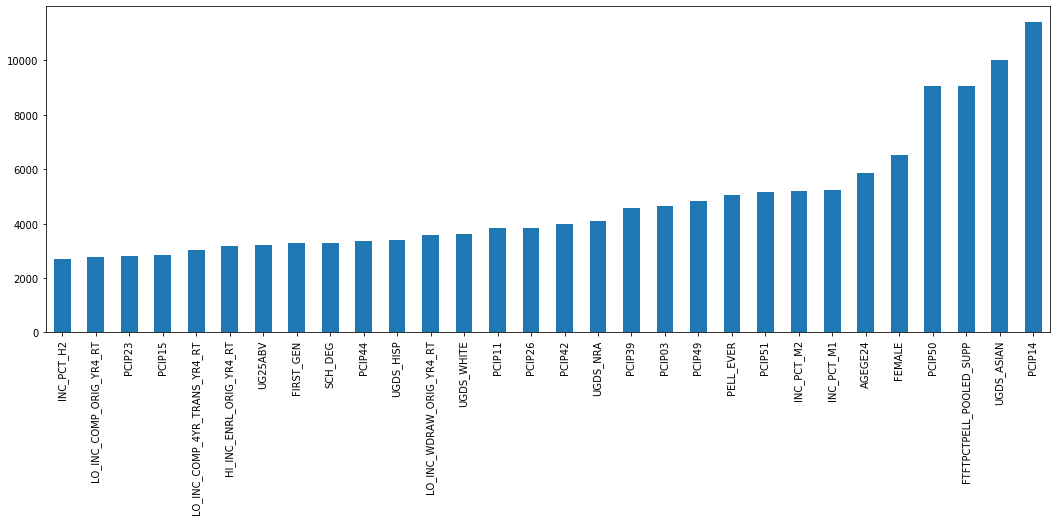

In [207]:

feature_importance = pd.Series(index = X_train.columns, data = np.abs(model_best.coef_))

n_selected_features = (feature_importance>3000).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))

feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (18,6))



In [208]:
feature_importance.sort_values(ascending = False)

PCIP14                     11422.329280
UGDS_ASIAN                 10026.748454
FTFTPCTPELL_POOLED_SUPP     9071.973954
PCIP50                      9071.341276
FEMALE                      6541.124218
                               ...     
NUM42_PROG                     0.000000
NUM41_PROG                     0.000000
NUM4_OTHER                     0.000000
NUM4_PROG                      0.000000
C150_L4_HISP                   0.000000
Length: 463, dtype: float64